In [1]:
# Initial Format and Clean Run Though

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyarrow as pa
import openpyxl as op
from rapidfuzz import process, fuzz
import re

print("All imports successful!")
print(f"NumPy: {np.__version__}")
print(f"Pandas: {pd.__version__}")
print(f"Matplotlib: {plt.matplotlib.__version__}")
print(f"Seaborn: {sns.__version__}")
print(f"PyArrow: {pa.__version__}")
print(f"Openpyxl: {op.__version__}")


All imports successful!
NumPy: 1.26.4
Pandas: 2.1.4
Matplotlib: 3.7.5
Seaborn: 0.13.2
PyArrow: 21.0.0
Openpyxl: 3.1.5


In [3]:
# Bring Sports Reference Basic School Stats into notebook (Offensive)
sportsref_cbb_2012_basic_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceBasicSchoolStats\sportsref_cbb_2012_basic_school_stats.csv", encoding="ISO-8859-1", header=1)
sportsref_cbb_2013_basic_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceBasicSchoolStats\sportsref_cbb_2013_basic_school_stats.csv", encoding="ISO-8859-1", header=1)
sportsref_cbb_2014_basic_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceBasicSchoolStats\sportsref_cbb_2014_basic_school_stats.csv", encoding="ISO-8859-1", header=1)
sportsref_cbb_2015_basic_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceBasicSchoolStats\sportsref_cbb_2015_basic_school_stats.csv", encoding="ISO-8859-1", header=1)
sportsref_cbb_2016_basic_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceBasicSchoolStats\sportsref_cbb_2016_basic_school_stats.csv", encoding="ISO-8859-1", header=1)
sportsref_cbb_2017_basic_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceBasicSchoolStats\sportsref_cbb_2017_basic_school_stats.csv", encoding="ISO-8859-1", header=1)
sportsref_cbb_2018_basic_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceBasicSchoolStats\sportsref_cbb_2018_basic_school_stats.csv", encoding="ISO-8859-1", header=1)
sportsref_cbb_2019_basic_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceBasicSchoolStats\sportsref_cbb_2019_basic_school_stats.csv", encoding="ISO-8859-1", header=1)
sportsref_cbb_2020_basic_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceBasicSchoolStats\sportsref_cbb_2020_basic_school_stats.csv", encoding="ISO-8859-1", header=1)
sportsref_cbb_2021_basic_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceBasicSchoolStats\sportsref_cbb_2021_basic_school_stats.csv", encoding="ISO-8859-1", header=1)
sportsref_cbb_2022_basic_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceBasicSchoolStats\sportsref_cbb_2022_basic_school_stats.csv", encoding="ISO-8859-1", header=1)
sportsref_cbb_2023_basic_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceBasicSchoolStats\sportsref_cbb_2023_basic_school_stats.csv", encoding="ISO-8859-1", header=1)
sportsref_cbb_2024_basic_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceBasicSchoolStats\sportsref_cbb_2024_basic_school_stats.csv", encoding="ISO-8859-1", header=1)
sportsref_cbb_2025_basic_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceBasicSchoolStats\sportsref_cbb_2025_basic_school_stats.csv", encoding="ISO-8859-1", header=1)


In [4]:
print(sportsref_cbb_2012_basic_school_stats.head())
print()
print(sportsref_cbb_2012_basic_school_stats.columns)
print()
print(sportsref_cbb_2012_basic_school_stats.shape)

   Year  Rk         School   G   W   L   W-L%    SRS    SOS  Unnamed: 9  ...  \
0  2012   1      Air Force  29  13  16  0.448  -0.45   2.14         NaN  ...   
1  2012   2          Akron  34  22  12  0.647   6.33   0.72         NaN  ...   
2  2012   3   Alabama NCAA  33  21  12  0.636  13.76   7.18         NaN  ...   
3  2012   4    Alabama A&M  28   7  21  0.250 -19.33 -10.79         NaN  ...   
4  2012   5  Alabama State  31  12  19  0.387 -15.79  -9.96         NaN  ...   

    FT  FTA    FT%  ORB   TRB  AST  STL  BLK  TOV   PF  
0  362  537  0.674  178   767  403  194   90  371  491  
1  513  741  0.692  398  1098  475  247  141  480  616  
2  443  623  0.711  352  1066  402  239  137  423  607  
3  359  555  0.647  316   849  314  178  119  463  617  
4  354  606  0.584  400   982  357  236   95  470  614  

[5 rows x 39 columns]

Index(['Year', 'Rk', 'School', 'G', 'W', 'L', 'W-L%', 'SRS', 'SOS',
       'Unnamed: 9', 'W.1', 'L.1', 'Unnamed: 12', 'W.2', 'L.2', 'Unnamed: 15',
      

In [5]:
# Combine all Basic School Stats into one df

df = [
    sportsref_cbb_2012_basic_school_stats,
    sportsref_cbb_2013_basic_school_stats,
    sportsref_cbb_2014_basic_school_stats,
    sportsref_cbb_2015_basic_school_stats,
    sportsref_cbb_2016_basic_school_stats,
    sportsref_cbb_2017_basic_school_stats,
    sportsref_cbb_2018_basic_school_stats,
    sportsref_cbb_2019_basic_school_stats,
    sportsref_cbb_2020_basic_school_stats,
    sportsref_cbb_2021_basic_school_stats,
    sportsref_cbb_2022_basic_school_stats,
    sportsref_cbb_2023_basic_school_stats,
    sportsref_cbb_2024_basic_school_stats,
    sportsref_cbb_2025_basic_school_stats
]

combined_sportsref_cbb_basic_school_stats = pd.concat(df, ignore_index=True)

combined_sportsref_cbb_basic_school_stats.reset_index(drop=True, inplace=True)

combined_sportsref_cbb_basic_school_stats.head()


,Year,Rk,School,G,W,L,W-L%,SRS,SOS,Unnamed: 9,...,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF
0,2012,1,Air Force,29,13,16,0.448,-0.45,2.14,NaN,...,362,537,0.674,178,767,403,194,90,371,491
1,2012,2,Akron,34,22,12,0.647,6.33,0.72,NaN,...,513,741,0.692,398,1098,475,247,141,480,616
2,2012,3,Alabama NCAA,33,21,12,0.636,13.76,7.18,NaN,...,443,623,0.711,352,1066,402,239,137,423,607
3,2012,4,Alabama A&M,28,7,21,0.250,-19.33,-10.79,NaN,...,359,555,0.647,316,849,314,178,119,463,617
4,2012,5,Alabama State,31,12,19,0.387,-15.79,-9.96,NaN,...,354,606,0.584,400,982,357,236,95,470,614


In [6]:
print(combined_sportsref_cbb_basic_school_stats.shape)
print()
nan_cols = combined_sportsref_cbb_basic_school_stats.columns[combined_sportsref_cbb_basic_school_stats.isna().any()]
print("Columns with NaN:", list(nan_cols))


(4946, 39)

Columns with NaN: ['Unnamed: 9', 'W.1', 'L.1', 'Unnamed: 12', 'W.2', 'L.2', 'Unnamed: 15', 'W.3', 'L.3', 'Unnamed: 18', 'Unnamed: 21']


In [7]:
print(combined_sportsref_cbb_basic_school_stats.isna().sum().sort_values(ascending=False))
print()
print(combined_sportsref_cbb_basic_school_stats.duplicated())
print()
print(combined_sportsref_cbb_basic_school_stats.info())
print()
print(combined_sportsref_cbb_basic_school_stats.describe())

Unnamed: 12    4946
Unnamed: 15    4946
Unnamed: 21    4946
Unnamed: 18    4946
Unnamed: 9     4946
W.1              12
L.1              12
W.2               2
L.2               2
L.3               1
W.3               1
3PA               0
3P%               0
FT                0
FTA               0
Year              0
FG%               0
FT%               0
ORB               0
TRB               0
AST               0
STL               0
BLK               0
TOV               0
3P                0
Tm.               0
FGA               0
FG                0
MP                0
Opp.              0
Rk                0
SOS               0
SRS               0
W-L%              0
L                 0
W                 0
G                 0
School            0
PF                0
dtype: int64

0       False
1       False
2       False
3       False
4       False
        ...  
4941    False
4942    False
4943    False
4944    False
4945    False
Length: 4946, dtype: bool

<class 'pandas.core.frame

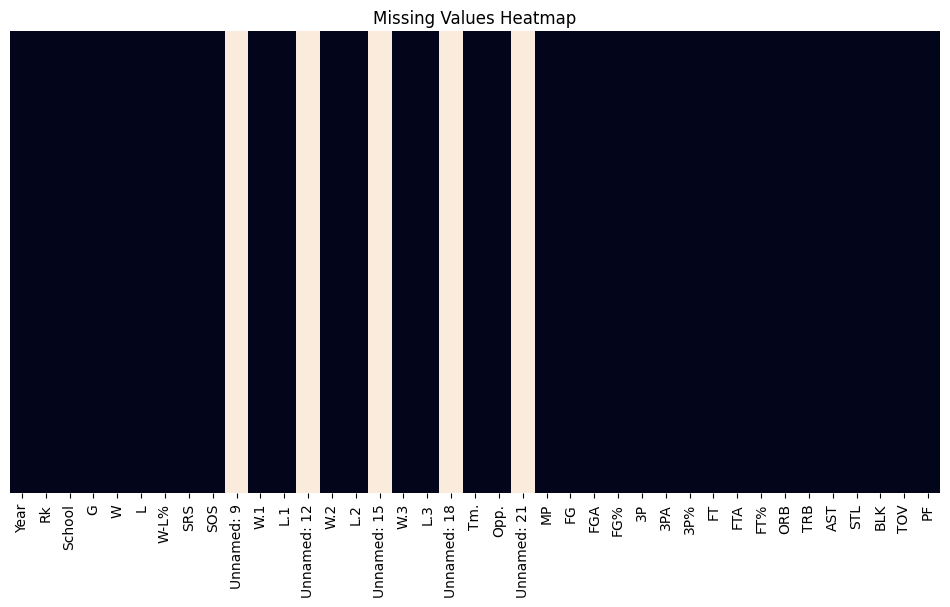

In [8]:
plt.figure(figsize=(12, 6))
sns.heatmap(combined_sportsref_cbb_basic_school_stats.isna(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [9]:
# Drop all columns with only NaN values in the rows
combined_sportsref_cbb_basic_school_stats = combined_sportsref_cbb_basic_school_stats.dropna(axis=1, how='all')

# Replace all other NaN values with 0
combined_sportsref_cbb_basic_school_stats.fillna(0, inplace=True)

In [10]:
print(combined_sportsref_cbb_basic_school_stats.shape)
print()
nan_cols = combined_sportsref_cbb_basic_school_stats.columns[combined_sportsref_cbb_basic_school_stats.isna().any()]
print("Columns with NaN:", list(nan_cols))
print()
print(combined_sportsref_cbb_basic_school_stats.isna().sum().sort_values(ascending=False))
print()
print(combined_sportsref_cbb_basic_school_stats.duplicated())
print()
print(combined_sportsref_cbb_basic_school_stats.info())
print()
print(combined_sportsref_cbb_basic_school_stats.describe())

(4946, 34)

Columns with NaN: []

Year      0
FTA       0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
FT        0
FT%       0
Rk        0
ORB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
FG        0
MP        0
Opp.      0
Tm.       0
L.3       0
W.3       0
L.2       0
W.2       0
L.1       0
W.1       0
SOS       0
SRS       0
W-L%      0
L         0
W         0
G         0
School    0
PF        0
dtype: int64

0       False
1       False
2       False
3       False
4       False
        ...  
4941    False
4942    False
4943    False
4944    False
4945    False
Length: 4946, dtype: bool

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4946 entries, 0 to 4945
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    4946 non-null   int64  
 1   Rk      4946 non-null   int64  
 2   School  4946 non-null   object 
 3   G       4946 non-null   int64  
 4   W       4946 non-null   int64

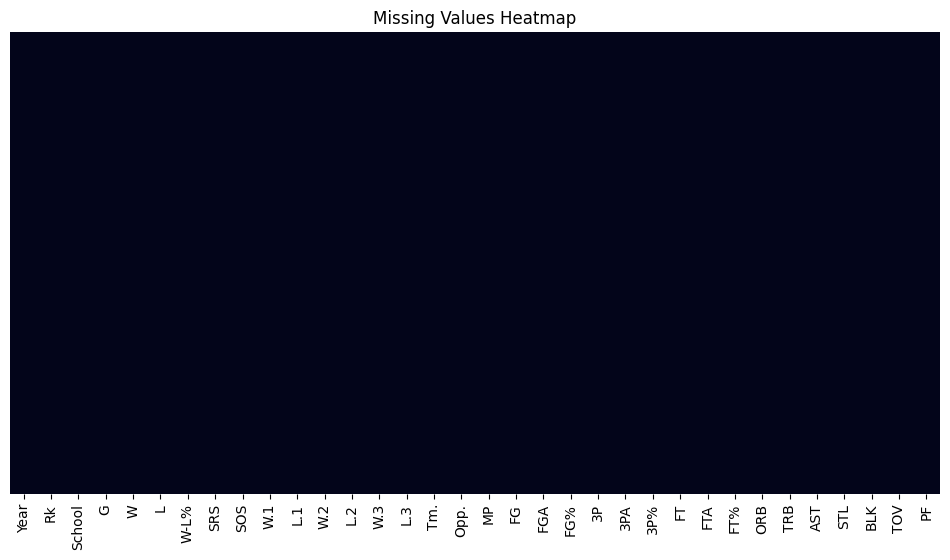

In [11]:
plt.figure(figsize=(12, 6))
sns.heatmap(combined_sportsref_cbb_basic_school_stats.isna(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [12]:
output_path = r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Cleaned and Formated\combined_sportsref_cbb_basic_school_stats.csv"

combined_sportsref_cbb_basic_school_stats.to_csv(output_path, index=False)

In [13]:
# Bring Evan Miya Player Rankings into the notebook
evan_miya_player_rankings_2012 = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\EvanMiyaPlayerRatings\2012_evan_miya_player_rankings.csv", encoding="ISO-8859-1", delimiter=',', header=None)
evan_miya_player_rankings_2013 = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\EvanMiyaPlayerRatings\2013_evan_miya_player_rankings.csv", encoding="ISO-8859-1", delimiter=',', header=None)
evan_miya_player_rankings_2014 = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\EvanMiyaPlayerRatings\2014_evan_miya_player_rankings.csv", encoding="ISO-8859-1", delimiter=',', header=None)
evan_miya_player_rankings_2015 = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\EvanMiyaPlayerRatings\2015_evan_miya_player_rankings.csv", encoding="ISO-8859-1", delimiter=',', header=None)
evan_miya_player_rankings_2016 = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\EvanMiyaPlayerRatings\2016_evan_miya_player_rankings.csv", encoding="ISO-8859-1", delimiter=',', header=None)
evan_miya_player_rankings_2017 = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\EvanMiyaPlayerRatings\2017_evan_miya_player_rankings.csv", encoding="ISO-8859-1", delimiter=',', header=None)
evan_miya_player_rankings_2018 = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\EvanMiyaPlayerRatings\2018_evan_miya_player_rankings.csv", encoding="ISO-8859-1", delimiter=',', header=None)
evan_miya_player_rankings_2019 = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\EvanMiyaPlayerRatings\2019_evan_miya_player_rankings.csv", encoding="ISO-8859-1", delimiter=',', header=None)
evan_miya_player_rankings_2020 = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\EvanMiyaPlayerRatings\2020_evan_miya_player_rankings.csv", encoding="ISO-8859-1", delimiter=',', header=None)
evan_miya_player_rankings_2021 = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\EvanMiyaPlayerRatings\2021_evan_miya_player_rankings.csv", encoding="ISO-8859-1", delimiter=',', header=None)
evan_miya_player_rankings_2022 = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\EvanMiyaPlayerRatings\2022_evan_miya_player_rankings.csv", encoding="ISO-8859-1", delimiter=',', header=None)
evan_miya_player_rankings_2023 = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\EvanMiyaPlayerRatings\2023_evan_miya_player_rankings.csv", encoding="ISO-8859-1", delimiter=',', header=None)
evan_miya_player_rankings_2024 = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\EvanMiyaPlayerRatings\2024_evan_miya_player_rankings.csv", encoding="ISO-8859-1", delimiter=',', header=None)
evan_miya_player_rankings_2025 = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\EvanMiyaPlayerRatings\2025_evan_miya_player_rankings.csv", encoding="ISO-8859-1", delimiter=',', header=None)

In [14]:
# Looks like all the infomation is in 1 column, will need to transpose the get it into a workable form
print(evan_miya_player_rankings_2025.shape)

(50745, 1)


In [15]:
evan_miya_player_rankings_2025.head(25)

,0
0,Rank
1,Name
2,Team
3,OBPR
4,DBPR
5,BPR
6,Poss
7,Box OBPR
8,Box DBPR
9,Box BPR


In [16]:
# List of DataFrames
df_list = [
    evan_miya_player_rankings_2012,
    evan_miya_player_rankings_2013,
    evan_miya_player_rankings_2014,
    evan_miya_player_rankings_2015,
    evan_miya_player_rankings_2016,
    evan_miya_player_rankings_2017,
    evan_miya_player_rankings_2018,
    evan_miya_player_rankings_2019,
    evan_miya_player_rankings_2020,
    evan_miya_player_rankings_2021,
    evan_miya_player_rankings_2022,
    evan_miya_player_rankings_2023,
    evan_miya_player_rankings_2024,
    evan_miya_player_rankings_2025
]

# Corresponding seasons
seasons = list(range(2012, 2026))

# Combined DataFrame to collect everything
evan_miya_all_years = pd.DataFrame()

# Loop through each season and its corresponding DataFrame
for df_raw, season in zip(df_list, seasons):
    
    # Drop fully empty rows
    df_raw.dropna(how='all', inplace=True)

    # Number of rows per player
    header = df_raw.iloc[:17, 0].tolist()

    # Get header from the first 17 rows
    print(f"{season}: {len(header)} columns, unique: {len(set(header))}")

    # Extract player blocks
    data = []
    
    rows_per_player = 17

    for i in range(rows_per_player, len(df_raw), rows_per_player):
        block = df_raw.iloc[i:i+rows_per_player, 0].tolist()
        if len(block) == rows_per_player:
            data.append(block)

    # Build DataFrame
    df_clean = pd.DataFrame(data, columns=header)

    # Add season column
    df_clean["Season"] = season

    # Replace NaNs and convert numerics
    df_clean.fillna(0, inplace=True)
    df_clean = df_clean.apply(pd.to_numeric, errors='ignore')

    # Append to combined DataFrame
    evan_miya_all_years = pd.concat([evan_miya_all_years, df_clean], ignore_index=True)


2012: 17 columns, unique: 17
2013: 17 columns, unique: 17
2014: 17 columns, unique: 17
2015: 17 columns, unique: 17
2016: 17 columns, unique: 17
2017: 17 columns, unique: 17
2018: 17 columns, unique: 17
2019: 17 columns, unique: 17
2020: 17 columns, unique: 17
2021: 17 columns, unique: 17
2022: 17 columns, unique: 17
2023: 17 columns, unique: 17
2024: 17 columns, unique: 17
2025: 17 columns, unique: 17


(40110, 18)

Columns with NaN: []

Rank                   0
Name                   0
Class                  0
Role                   0
Position               0
+/-                    0
Adj Team Eff Margin    0
Adj Team Def Eff       0
Adj Team Off Eff       0
Box BPR                0
Box DBPR               0
Box OBPR               0
Poss                   0
BPR                    0
DBPR                   0
OBPR                   0
Team                   0
Season                 0
dtype: int64

0        False
1        False
2        False
3        False
4        False
         ...  
40105    False
40106    False
40107    False
40108    False
40109    False
Length: 40110, dtype: bool

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40110 entries, 0 to 40109
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Rank                 40110 non-null  object
 1   Name                 40110 non-null  object
 2 

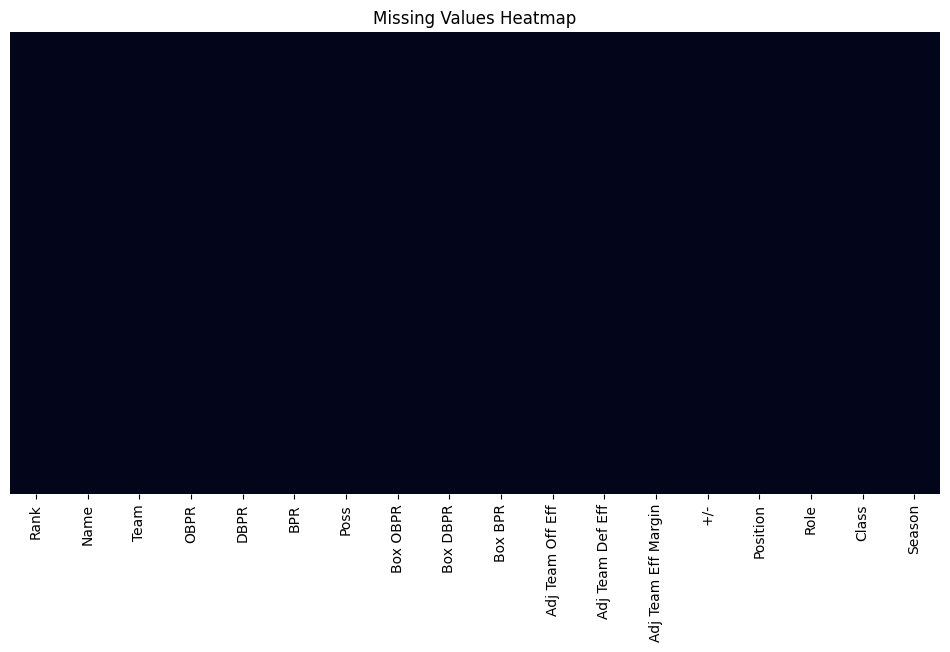

In [17]:
print(evan_miya_all_years.shape)
print()
nan_cols = evan_miya_all_years.columns[evan_miya_all_years.isna().any()]
print("Columns with NaN:", list(nan_cols))
print()
print(evan_miya_all_years.isna().sum().sort_values(ascending=False))
print()
print(evan_miya_all_years.duplicated())
print()
print(evan_miya_all_years.info())
print()
print(evan_miya_all_years.describe())
print()
plt.figure(figsize=(12, 6))
sns.heatmap(evan_miya_all_years.isna(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [18]:
# Show all columns where '?' appears in at least one cell
cols_with_question = [col for col in evan_miya_all_years.columns if evan_miya_all_years[col].astype(str).str.contains(r"\?").any()]
print("Columns with '?':", cols_with_question)

# Count occurrences of '?' in each column
question_counts = {
    col: evan_miya_all_years[col].astype(str).str.count(r"\?").sum()
    for col in cols_with_question
}
print("Counts of '?':")
for col, count in question_counts.items():
    print(f"{col}: {count}")

Columns with '?': ['Name', 'Position', 'Role', 'Class']
Counts of '?':
Name: 16
Position: 66
Role: 66
Class: 37125


In [19]:
# Create a boolean mask for rows with '?' anywhere
mask = evan_miya_all_years.apply(lambda row: row.astype(str).str.contains(r"\?").any(), axis=1)

# Filter the DataFrame
rows_with_question = evan_miya_all_years[mask]

# Display matching rows
print(f"Found {len(rows_with_question)} rows containing '?':")
display(rows_with_question)


Found 37132 rows containing '?':


,Rank,Name,Team,OBPR,DBPR,BPR,Poss,Box OBPR,Box DBPR,Box BPR,Adj Team Off Eff,Adj Team Def Eff,Adj Team Eff Margin,+/-,Position,Role,Class,Season
0,1,Dion Waiters,Syracuse,4.0,3.71,7.71,1416,3.23,1.88,5.1,115.1,85.6,29.5,306,1.6,1.6,?,2012
1,2,Anthony Davis,Kentucky,4.08,3.35,7.43,2008,3.72,3.68,7.4,119.5,89.1,30.3,461,5,2.7,?,2012
2,3,Jared Sullinger,Ohio State,3.45,3.3,6.75,1874,3.41,2.32,5.73,114.6,84.8,29.8,360,5,2.3,?,2012
3,4,Mike Bruesewitz,Wisconsin,3.9,2.71,6.61,1310,1.88,0.95,2.83,115.4,85.3,30.1,263,3.5,3.5,?,2012
4,5,Joe Ragland,Wichita State,5.04,1.37,6.41,1408,3.83,0.22,4.05,117.5,93.3,24.1,289,1.7,1,?,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38080,955,JR Konieczny,Notre Dame,0.98,0.78,1.76,861,0,0,0,110.3,99.8,10.5,13,?,?,JR,2025
39352,2226,Andrija Bukumirovi?,Tennessee-Martin,0.89,-1.57,-0.69,769,-0.04,-0.68,-0.73,105.5,110,-4.5,-5,4.9,4.1,FR,2025
39482,2356,Filip Radakovi?,Tennessee-Martin,-0.61,-0.42,-1.03,849,-1.22,-0.92,-2.14,102.7,103.9,-1.2,-10,3.3,4.5,FR,2025
39785,2659,Matija ui?,Tennessee-Martin,-0.69,-1.24,-1.93,1138,-0.19,-1.48,-1.67,100.1,105.9,-5.8,-61,3.1,3.8,FR,2025


In [20]:
evan_miya_all_years = evan_miya_all_years.replace("?", 0)


In [21]:
# Check to see if there are any rows with same inputs as my column headers

#header_values = evan_miya_all_years.columns.tolist()
#matching_rows = evan_miya_all_years[evan_miya_all_years.apply(lambda row: row.tolist() == header_values, axis=1)]
#print(f"Found {len(matching_rows)} duplicate header rows:")
#display(matching_rows)

In [22]:
'''
Change Dtype from Object to numerical values of Int for Rank and Float for all others.
Name, Team, Role and Class will be left as Object
'''
# Make a Copy of the all years, to prevent it looking like a slice
df = evan_miya_all_years.copy()

# Verify that all column headers are strings
df.columns = df.columns.map(str)

# Drop any rows that have headers in the row
header_like_values = ['Rank', 'Name', 'Team', 'Role', 'Class']
mask = df.apply(lambda row: row.astype(str).isin(header_like_values)).any(axis=1)
df = df[~mask]

# Change all ? to 0
df.replace('?', 0, inplace=True)

# Convert designated columns from Object to Float and Int
exclude_cols = ['Name', 'Team', 'Role', 'Class', 'Rank']
convert_cols = [col for col in df.columns if col not in exclude_cols]
df.loc[:, convert_cols] = df.loc[:, convert_cols].apply(pd.to_numeric, errors='coerce').fillna(0).astype('float64')

# Check columns for no numerical values
for col in convert_cols:
    bad_values = df[col][df[col].apply(lambda x: not str(x).replace('.', '', 1).isdigit())]
    if not bad_values.empty:
        print(f"Column '{col}' has non-numeric values:")
        #print(bad_values.unique())

# Clean up none numerical values
for col in convert_cols:
    df[col] = df[col].replace("?", 0)                     # Handle placeholders
    df[col] = df[col].astype(str).str.replace(",", "")    # Remove commas
    df[col] = pd.to_numeric(df[col], errors='coerce')     # Convert to float
df[convert_cols] = df[convert_cols].fillna(0).astype('float64')
if 'Rank' in df.columns:
    df['Rank'] = df['Rank'].astype('int')


print(df.info())
print()
print(df.describe())

evan_miya_all_years = df

Column 'OBPR' has non-numeric values:
Column 'DBPR' has non-numeric values:
Column 'BPR' has non-numeric values:
Column 'Box OBPR' has non-numeric values:
Column 'Box DBPR' has non-numeric values:
Column 'Box BPR' has non-numeric values:
Column 'Adj Team Eff Margin' has non-numeric values:
Column '+/-' has non-numeric values:
<class 'pandas.core.frame.DataFrame'>
Index: 40108 entries, 0 to 40109
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 40108 non-null  int32  
 1   Name                 40108 non-null  object 
 2   Team                 40108 non-null  object 
 3   OBPR                 40108 non-null  float64
 4   DBPR                 40108 non-null  float64
 5   BPR                  40108 non-null  float64
 6   Poss                 40108 non-null  float64
 7   Box OBPR             40108 non-null  float64
 8   Box DBPR             40108 non-null  float64
 9   Box BPR      

In [23]:
print(evan_miya_all_years.info())
print()
print(evan_miya_all_years.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 40108 entries, 0 to 40109
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 40108 non-null  int32  
 1   Name                 40108 non-null  object 
 2   Team                 40108 non-null  object 
 3   OBPR                 40108 non-null  float64
 4   DBPR                 40108 non-null  float64
 5   BPR                  40108 non-null  float64
 6   Poss                 40108 non-null  float64
 7   Box OBPR             40108 non-null  float64
 8   Box DBPR             40108 non-null  float64
 9   Box BPR              40108 non-null  float64
 10  Adj Team Off Eff     40108 non-null  float64
 11  Adj Team Def Eff     40108 non-null  float64
 12  Adj Team Eff Margin  40108 non-null  float64
 13  +/-                  40108 non-null  float64
 14  Position             40108 non-null  float64
 15  Role                 40108 non-null  obje

In [24]:
output_path = r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Cleaned and Formated\evan_miya_all_years.csv"

evan_miya_all_years.to_csv(output_path, index=False)

In [25]:
# Bring Sports Reference Individual Coaches Statistics into notebook
sportsref_cbb_2012_coaches_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceCoachesStats\2012_sports_reference_coaches_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2013_coaches_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceCoachesStats\2013_sports_reference_coaches_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2014_coaches_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceCoachesStats\2014_sports_reference_coaches_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2015_coaches_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceCoachesStats\2015_sports_reference_coaches_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2016_coaches_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceCoachesStats\2016_sports_reference_coaches_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2017_coaches_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceCoachesStats\2017_sports_reference_coaches_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2018_coaches_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceCoachesStats\2018_sports_reference_coaches_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2019_coaches_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceCoachesStats\2019_sports_reference_coaches_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2020_coaches_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceCoachesStats\2020_sports_reference_coaches_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2021_coaches_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceCoachesStats\2021_sports_reference_coaches_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2022_coaches_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceCoachesStats\2022_sports_reference_coaches_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2023_coaches_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceCoachesStats\2023_sports_reference_coaches_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2024_coaches_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceCoachesStats\2024_sports_reference_coaches_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2025_coaches_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceCoachesStats\2025_sports_reference_coaches_stats.csv", header=1, encoding="ISO-8859-1")


In [26]:
print(sportsref_cbb_2012_coaches_stats.head())
print()
print(sportsref_cbb_2012_coaches_stats.columns)
print()
print(sportsref_cbb_2012_coaches_stats.shape)
print()
print(sportsref_cbb_2012_coaches_stats.info())
print()
print(sportsref_cbb_2012_coaches_stats.describe())

             Coach                  School Conference  Unnamed: 3   W   L  \
0       Mike Adras        Northern Arizona    Big Sky         NaN   2   7   
1       Jesse Agel                   Brown        Ivy         NaN   8  23   
2  Casey Alexander                 Stetson      A-Sun         NaN   9  20   
3     Steve Alford              New Mexico        MWC         NaN  28   7   
4    Frankie Allen  Maryland-Eastern Shore       MEAC         NaN   7  23   

    W-L%  AP Pre  AP Post   NCAA Tournament  ...  FF Chmp  Unnamed: 19  W.2  \
0  0.222     NaN      NaN               NaN  ... NaN  NaN          NaN  193   
1  0.258     NaN      NaN               NaN  ... NaN  NaN          NaN   39   
2  0.310     NaN      NaN               NaN  ... NaN  NaN          NaN    9   
3  0.800     NaN     21.0  Lost Third Round  ... NaN  NaN          NaN  356   
4  0.233     NaN      NaN               NaN  ... NaN  NaN          NaN  257   

   L.2  W-L%.2  NCAA.1  S16.1  FF.1  Chmp.1  
0  170   0.532  

In [27]:
# List of DataFrames
df_list = [
    sportsref_cbb_2012_coaches_stats,
    sportsref_cbb_2013_coaches_stats,
    sportsref_cbb_2014_coaches_stats,
    sportsref_cbb_2015_coaches_stats,
    sportsref_cbb_2016_coaches_stats,
    sportsref_cbb_2017_coaches_stats,
    sportsref_cbb_2018_coaches_stats,
    sportsref_cbb_2019_coaches_stats,
    sportsref_cbb_2020_coaches_stats,
    sportsref_cbb_2021_coaches_stats,
    sportsref_cbb_2022_coaches_stats,
    sportsref_cbb_2023_coaches_stats,
    sportsref_cbb_2024_coaches_stats,
    sportsref_cbb_2025_coaches_stats
]

# Seasons
seasons = list(range(2012, 2026))

# Extract standard columns from the 2025 file
expected_columns = sportsref_cbb_2025_coaches_stats.columns.tolist()

# Initialize combined DataFrame
combined_sportsref_cbb_coaches_stats = pd.DataFrame(columns=expected_columns + ['Season'])

# Loop through each season and its corresponding DataFrame
for df_raw, season in zip(df_list, seasons):
    if season == 2021:
        print("Skipping 2021 due to duplicate headers")
        continue
    
    # Skip empty rows or metadata
    df_trimmed = df_raw.dropna(how='all')     
   
    # Align with expected structure
    df_trimmed.columns = expected_columns
    df_trimmed["Season"] = season    
    
    # Optional: Filter valid rows (e.g., drop rows with missing 'Coach' or all-NaN)
    df_trimmed = df_trimmed[df_trimmed["Coach"].notna()]
    
    combined_sportsref_cbb_coaches_stats = pd.concat([combined_sportsref_cbb_coaches_stats, df_trimmed], ignore_index=True)

Skipping 2021 due to duplicate headers


C:\Users\Colt Meyer\AppData\Local\Temp\ipykernel_31888\3669138158.py:44: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_sportsref_cbb_coaches_stats = pd.concat([combined_sportsref_cbb_coaches_stats, df_trimmed], ignore_index=True)


In [28]:
combined_sportsref_cbb_coaches_stats

,Coach,School,Conference,Unnamed: 3,W,L,W-L%,AP Pre,AP Post,NCAA Tournament,...,Chmp,Unnamed: 19,W.2,L.2,W-L%.2,NCAA.1,S16.1,FF.1,Chmp.1,Season
0,Mike Adras,Northern Arizona,Big Sky,NaN,2,7,0.222,NaN,NaN,NaN,...,NaN,NaN,193,170,0.532,1.0,NaN,NaN,NaN,2012
1,Jesse Agel,Brown,Ivy,NaN,8,23,0.258,NaN,NaN,NaN,...,NaN,NaN,39,79,0.331,NaN,NaN,NaN,NaN,2012
2,Casey Alexander,Stetson,A-Sun,NaN,9,20,0.310,NaN,NaN,NaN,...,NaN,NaN,9,20,0.310,NaN,NaN,NaN,NaN,2012
3,Steve Alford,New Mexico,MWC,NaN,28,7,0.800,NaN,21.0,Lost Third Round,...,NaN,NaN,356,200,0.640,6.0,1.0,NaN,NaN,2012
4,Frankie Allen,Maryland-Eastern Shore,MEAC,NaN,7,23,0.233,NaN,NaN,NaN,...,NaN,NaN,257,383,0.402,2.0,NaN,NaN,NaN,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4671,Jeff Wulbrun,Denver,Summit,NaN,10,19,0.345,NaN,NaN,NaN,...,NaN,NaN,53,74,0.417,NaN,NaN,NaN,NaN,2025
4672,Kevin Young,BYU,Big 12,NaN,26,10,0.722,NaN,13.0,Lost Regional Semifinal,...,NaN,NaN,26,10,0.722,1.0,1.0,NaN,NaN,2025
4673,Mike Young,Virginia Tech,ACC,NaN,13,19,0.406,NaN,NaN,NaN,...,NaN,NaN,404,329,0.551,7.0,NaN,NaN,NaN,2025
4674,Derrick Zimmerman,Louisiana,Sun Belt,NaN,9,12,0.429,NaN,NaN,NaN,...,NaN,NaN,9,12,0.429,NaN,NaN,NaN,NaN,2025


In [29]:
# Grab actual column names from the second DataFrame (2020)
expected_columns = sportsref_cbb_2020_coaches_stats.columns.tolist()

# Fix raw 2021 header safely
df_2021_raw = sportsref_cbb_2021_coaches_stats.copy()

# Drop metadata rows if any (adjust as needed)
df_2021_cleaned = df_2021_raw.iloc[2:].copy()

# Set columns properly — NOT from row values
df_2021_cleaned.columns = expected_columns

# Add season column
df_2021_cleaned["Season"] = 2021

# Sanity check for duplicates
if len(df_2021_cleaned.columns) != len(set(df_2021_cleaned.columns)):
    print("Columns are still duplicated after repair")
else:
    print("Header fixed for 2021")

# Merge safely
combined_sportsref_cbb_coaches_stats = pd.concat([combined_sportsref_cbb_coaches_stats, df_2021_cleaned], ignore_index=True)

Header fixed for 2021


             Coach                  School Conference Unnamed: 3   W   L  \
0       Mike Adras        Northern Arizona    Big Sky        NaN   2   7   
1       Jesse Agel                   Brown        Ivy        NaN   8  23   
2  Casey Alexander                 Stetson      A-Sun        NaN   9  20   
3     Steve Alford              New Mexico        MWC        NaN  28   7   
4    Frankie Allen  Maryland-Eastern Shore       MEAC        NaN   7  23   

    W-L%  AP Pre  AP Post   NCAA Tournament  ... Chmp Unnamed: 19  W.2  L.2  \
0  0.222     NaN      NaN               NaN  ...  NaN         NaN  193  170   
1  0.258     NaN      NaN               NaN  ...  NaN         NaN   39   79   
2  0.310     NaN      NaN               NaN  ...  NaN         NaN    9   20   
3  0.800     NaN     21.0  Lost Third Round  ...  NaN         NaN  356  200   
4  0.233     NaN      NaN               NaN  ...  NaN         NaN  257  383   

   W-L%.2  NCAA.1  S16.1  FF.1  Chmp.1  Season  
0   0.532     1.0  

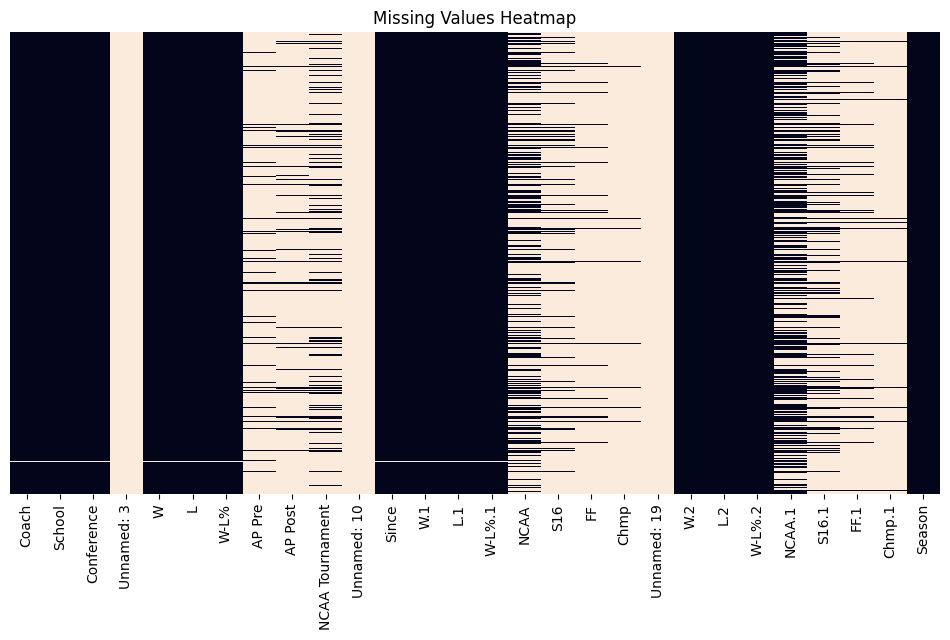

In [30]:
print(combined_sportsref_cbb_coaches_stats.head())
print()
print(combined_sportsref_cbb_coaches_stats.columns)
print()
print(combined_sportsref_cbb_coaches_stats.shape)
print()
print(combined_sportsref_cbb_coaches_stats.info())
print()
print(combined_sportsref_cbb_coaches_stats.describe())
print()
plt.figure(figsize=(12, 6))
sns.heatmap(combined_sportsref_cbb_coaches_stats.isna(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()


(5034, 25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5034 entries, 0 to 5033
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Coach            5034 non-null   object 
 1   School           5034 non-null   object 
 2   Conference       5034 non-null   object 
 3   W                5034 non-null   float64
 4   L                5034 non-null   float64
 5   W-L%             5034 non-null   float64
 6   AP Pre           5034 non-null   float64
 7   AP Post          5034 non-null   float64
 8   NCAA Tournament  5034 non-null   object 
 9   Since            5034 non-null   object 
 10  W.1              5034 non-null   float64
 11  L.1              5034 non-null   float64
 12  W-L%.1           5034 non-null   float64
 13  NCAA             5034 non-null   float64
 14  S16              5034 non-null   float64
 15  FF               5034 non-null   float64
 16  Chmp             5034 non-null   float64
 17  W

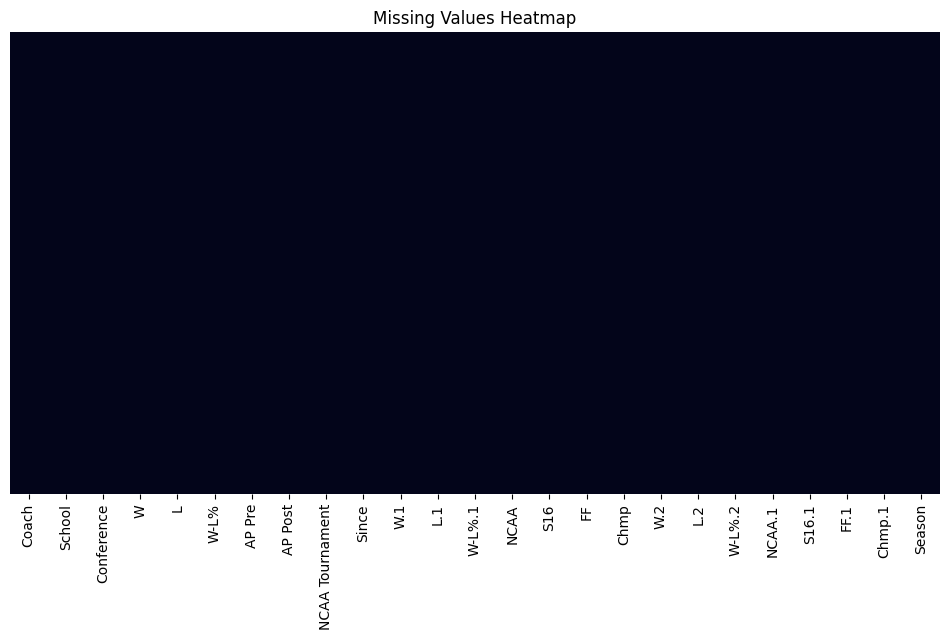

In [31]:
# Take care of NaN values - Drop completely empty columns and fill all other NaN with 0 as the value makes sense
# Drop all columns with only NaN values in the rows
combined_sportsref_cbb_coaches_stats = combined_sportsref_cbb_coaches_stats.dropna(axis=1, how='all')

combined_sportsref_cbb_coaches_stats['Season'] = pd.to_numeric(
    combined_sportsref_cbb_coaches_stats['Season'], errors='coerce'
).astype('Int64')

# Replace all other NaN values with 0
combined_sportsref_cbb_coaches_stats.fillna(0, inplace=True)
print()
print(combined_sportsref_cbb_coaches_stats.shape)
print()
print(combined_sportsref_cbb_coaches_stats.info())
print()
print(combined_sportsref_cbb_coaches_stats.describe())
print()
plt.figure(figsize=(12, 6))
sns.heatmap(combined_sportsref_cbb_coaches_stats.isna(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [32]:
output_path = r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Cleaned and Formated\combined_sportsref_cbb_coaches_stats.csv"

combined_sportsref_cbb_coaches_stats.to_csv(output_path, index=False)

In [33]:
# Bring NBA MockDraft.net - Mock Draft into notebook
nba_mock_draft_net_2012 = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\NBAMockDraft.Net\2012_NBA_Mock_Draft_Net.csv", header=0, encoding="ISO-8859-1")
nba_mock_draft_net_2013 = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\NBAMockDraft.Net\2013_NBA_Mock_Draft_Net.csv", header=0, encoding="ISO-8859-1")
nba_mock_draft_net_2014 = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\NBAMockDraft.Net\2014_NBA_Mock_Draft_Net.csv", header=0, encoding="ISO-8859-1")
nba_mock_draft_net_2015 = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\NBAMockDraft.Net\2015_NBA_Mock_Draft_Net.csv", header=0, encoding="ISO-8859-1")
nba_mock_draft_net_2016 = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\NBAMockDraft.Net\2016_NBA_Mock_Draft_Net.csv", header=0, encoding="ISO-8859-1")
nba_mock_draft_net_2017 = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\NBAMockDraft.Net\2017_NBA_Mock_Draft_Net.csv", header=0, encoding="ISO-8859-1")
nba_mock_draft_net_2018 = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\NBAMockDraft.Net\2018_NBA_Mock_Draft_Net.csv", header=0, encoding="ISO-8859-1")
nba_mock_draft_net_2019 = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\NBAMockDraft.Net\2019_NBA_Mock_Draft_Net.csv", header=0, encoding="ISO-8859-1")
nba_mock_draft_net_2020 = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\NBAMockDraft.Net\2020_NBA_Mock_Draft_Net.csv", header=0, encoding="ISO-8859-1")
nba_mock_draft_net_2021 = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\NBAMockDraft.Net\2021_NBA_Mock_Draft_Net.csv", header=0, encoding="ISO-8859-1")
nba_mock_draft_net_2022 = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\NBAMockDraft.Net\2022_NBA_Mock_Draft_Net.csv", header=0, encoding="ISO-8859-1")
nba_mock_draft_net_2023 = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\NBAMockDraft.Net\2023_NBA_Mock_Draft_Net.csv", header=0, encoding="ISO-8859-1")
nba_mock_draft_net_2024 = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\NBAMockDraft.Net\2024_NBA_Mock_Draft_Net.csv", header=0, encoding="ISO-8859-1")
nba_mock_draft_net_2025 = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\NBAMockDraft.Net\2025_NBA_Mock_Draft_Net.csv", header=0, encoding="ISO-8859-1")


In [34]:
print(nba_mock_draft_net_2025.head())
print()
print(nba_mock_draft_net_2025.columns)
print()
print(nba_mock_draft_net_2025.shape)
print()
print(nba_mock_draft_net_2025.info())
print()
print(nba_mock_draft_net_2025.describe())

  Pick Number           Team          Player Height Weight Position   School   \
0           1         Dallas    Cooper Flagg  9-Jun    220    SF/PF      Duke   
1           2    San Antonio    Dylan Harper  6-Jun    215    PG/SG   Rutgers   
2           3   Philadelphia    VJ Edgecombe  5-Jun    195    PG/SG    Baylor   
3           4      Charlotte    Kon Knueppel  7-Jun    215    SG/SF      Duke   
4           5           Utah  Jeremiah Fears  4-Jun    180    PG/SG  Oklahoma   

  Class  
0   Fr.  
1   Fr.  
2   Fr.  
3   Fr.  
4   Fr.  

Index(['Pick Number', 'Team', 'Player', 'Height', 'Weight', 'Position',
       'School ', 'Class'],
      dtype='object')

(61, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Pick Number  61 non-null     object
 1   Team         61 non-null     object
 2   Player       61 non-null     object
 3   Height  

In [35]:
# List of DataFrames
df_list = [
    nba_mock_draft_net_2012,
    nba_mock_draft_net_2013,
    nba_mock_draft_net_2014,
    nba_mock_draft_net_2015,
    nba_mock_draft_net_2016,
    nba_mock_draft_net_2017,
    nba_mock_draft_net_2018,
    nba_mock_draft_net_2019,
    nba_mock_draft_net_2020,
    nba_mock_draft_net_2021,
    nba_mock_draft_net_2022,
    nba_mock_draft_net_2023,
    nba_mock_draft_net_2024,
    nba_mock_draft_net_2025
]

# Corresponding years
years = list(range(2012, 2026))

# Column schema
standard_columns = ['Pick Number', 'Team', 'Player', 'Height', 'Weight', 'Position', 'School', 'Class']

# Start fresh
combined_draft_data = pd.DataFrame(columns=standard_columns + ['Year'])

# Loop over each year and DataFrame
for df_single, year in zip(df_list, years):
    df_single = df_single.copy()
    df_single.dropna(how='all', inplace=True)

    # Drop embedded header row if needed
    if not df_single.iloc[0].apply(lambda x: str(x).isdigit()).any():
        df_single = df_single.iloc[1:].copy()

    # Trim columns and label correctly
    df_single = df_single.iloc[:, :len(standard_columns)]
    df_single.columns = standard_columns
    df_single["Year"] = year

    # Append
    combined_draft_data = pd.concat([combined_draft_data, df_single], ignore_index=True)

  Pick Number              Team               Player  Height Weight Position  \
0           1   New Orleans Old        Anthony Davis  10-Jun    222       PF   
1           2         Charlotte         Bradley Beal   4-Jun    202       SG   
2           3        Washington  Michael Kidd-Gil...   7-Jun    233       SF   
3           4         Cleveland      Harrison Barnes   8-Jun    228       SF   
4           5        Sacramento      Thomas Robinson   9-Jun    244       PF   

           School Class  Year  
0        Kentucky   Fr.  2012  
1         Florida   Fr.  2012  
2        Kentucky   Fr.  2012  
3  North Carolina   So.  2012  
4          Kansas   Jr.  2012  

Index(['Pick Number', 'Team', 'Player', 'Height', 'Weight', 'Position',
       'School', 'Class', 'Year'],
      dtype='object')

(941, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 


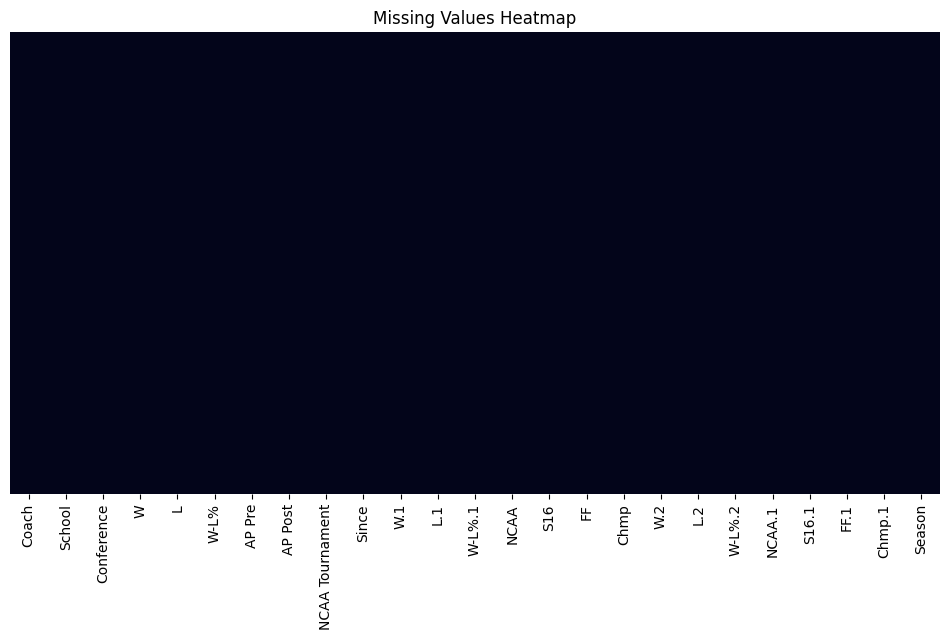

In [36]:
print(combined_draft_data.head())
print()
print(combined_draft_data.columns)
print()
print(combined_draft_data.shape)
print()
print(combined_draft_data.info())
print()
print(combined_draft_data.describe())
print()
plt.figure(figsize=(12, 6))
sns.heatmap(combined_sportsref_cbb_coaches_stats.isna(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [37]:
# Convert Pick Number to integer (safely handles bad values)
combined_draft_data['Pick Number'] = pd.to_numeric(combined_draft_data['Pick Number'], errors='coerce').astype('Int64')

# Convert Year to integer
combined_draft_data['Year'] = pd.to_numeric(combined_draft_data['Year'], errors='coerce').astype('Int64')

#Didn't change more because from this I only really need pick number, college and year.  the rest I am planning to drop
print(combined_draft_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Pick Number  837 non-null    Int64 
 1   Team         842 non-null    object
 2   Player       842 non-null    object
 3   Height       838 non-null    object
 4   Weight       838 non-null    object
 5   Position     838 non-null    object
 6   School       837 non-null    object
 7   Class        837 non-null    object
 8   Year         941 non-null    Int64 
dtypes: Int64(2), object(7)
memory usage: 68.1+ KB
None


In [38]:
output_path = r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Cleaned and Formated\combined_draft_data.csv"

combined_draft_data.to_csv(output_path, index=False)

In [39]:
# Bring Pomeroy College Basketball Team Ratings into notebook
pomeroy_cbb_2012_team_ratings = pd.read_excel(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\PomeroyCollegeBasketballRatings\2012_pomeroy_cbb_ratings.xlsx", header=0)
pomeroy_cbb_2013_team_ratings = pd.read_excel(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\PomeroyCollegeBasketballRatings\2013_pomeroy_cbb_ratings.xlsx", header=0)
pomeroy_cbb_2014_team_ratings = pd.read_excel(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\PomeroyCollegeBasketballRatings\2014_pomeroy_cbb_ratings.xlsx", header=0)
pomeroy_cbb_2015_team_ratings = pd.read_excel(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\PomeroyCollegeBasketballRatings\2015_pomeroy_cbb_ratings.xlsx", header=0)
pomeroy_cbb_2016_team_ratings = pd.read_excel(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\PomeroyCollegeBasketballRatings\2016_pomeroy_cbb_ratings.xlsx", header=0)
pomeroy_cbb_2017_team_ratings = pd.read_excel(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\PomeroyCollegeBasketballRatings\2017_pomeroy_cbb_ratings.xlsx", header=0)
pomeroy_cbb_2018_team_ratings = pd.read_excel(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\PomeroyCollegeBasketballRatings\2018_pomeroy_cbb_ratings.xlsx", header=0)
pomeroy_cbb_2019_team_ratings = pd.read_excel(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\PomeroyCollegeBasketballRatings\2019_pomeroy_cbb_ratings.xlsx", header=0)
pomeroy_cbb_2020_team_ratings = pd.read_excel(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\PomeroyCollegeBasketballRatings\2020_pomeroy_cbb_ratings.xlsx", header=0)
pomeroy_cbb_2021_team_ratings = pd.read_excel(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\PomeroyCollegeBasketballRatings\2021_pomeroy_cbb_ratings.xlsx", header=0)
pomeroy_cbb_2022_team_ratings = pd.read_excel(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\PomeroyCollegeBasketballRatings\2022_pomeroy_cbb_ratings.xlsx", header=0)
pomeroy_cbb_2023_team_ratings = pd.read_excel(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\PomeroyCollegeBasketballRatings\2023_pomeroy_cbb_ratings.xlsx", header=0)
pomeroy_cbb_2024_team_ratings = pd.read_excel(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\PomeroyCollegeBasketballRatings\2024_pomeroy_cbb_ratings.xlsx", header=0)
pomeroy_cbb_2025_team_ratings = pd.read_excel(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\PomeroyCollegeBasketballRatings\2025_pomeroy_cbb_ratings.xlsx", header=0)


In [40]:
print(pomeroy_cbb_2025_team_ratings.head())
print()
print(pomeroy_cbb_2025_team_ratings.columns)
print()
print(pomeroy_cbb_2025_team_ratings.shape)
print()
print(pomeroy_cbb_2025_team_ratings.info())
print()
print(pomeroy_cbb_2025_team_ratings.describe())

  Rk         Team Conf   W-L NetRtg   ORtg  Unnamed: 6  DRtg  Unnamed: 8  \
0  1       Duke 1  ACC  35-4  39.29  130.1         1.0  90.8         5.0   
1  2    Houston 1  B12  35-5  36.59  123.4        12.0  86.8         1.0   
2  3    Florida 1  SEC  36-4  36.46  128.2         2.0  91.8         6.0   
3  4     Auburn 1  SEC  32-6  35.05  127.2         3.0  92.1         9.0   
4  5  Tennessee 2  SEC  30-8  30.93  120.7        17.0  89.7         3.0   

   AdjT  ...   Luck Unnamed: 12  NetRtg.1 Unnamed: 14  ORtg.1 Unnamed: 16  \
0    66  ... -0.026       252.0     11.51        51.0   113.4        43.0   
1  61.9  ...   0.02       129.0     15.63        15.0     115        16.0   
2  70.1  ...  0.032       100.0     16.15        12.0   115.6        10.0   
3  68.2  ...  0.026       116.0     19.63         2.0   117.4         2.0   
4  63.7  ...  0.029       108.0      16.8         7.0     117         3.0   

   DRtg.1 Unnamed: 18  NetRtg.2 Unnamed: 20  
0   101.9        55.0      9.46   

In [41]:
# List of DataFrames
df_list = [
    pomeroy_cbb_2012_team_ratings,
    pomeroy_cbb_2013_team_ratings,
    pomeroy_cbb_2014_team_ratings,
    pomeroy_cbb_2015_team_ratings,
    pomeroy_cbb_2016_team_ratings,
    pomeroy_cbb_2017_team_ratings,
    pomeroy_cbb_2018_team_ratings,
    pomeroy_cbb_2019_team_ratings,
    pomeroy_cbb_2020_team_ratings,
    pomeroy_cbb_2021_team_ratings,
    pomeroy_cbb_2022_team_ratings,
    pomeroy_cbb_2023_team_ratings,
    pomeroy_cbb_2024_team_ratings,
    pomeroy_cbb_2025_team_ratings
]

# Corresponding years
years = list(range(2012, 2026))

# Column schema
standard_columns = ['Rank', 'Team', 'Conference', 'W-L', 'NetRtg', 'ORtg', 'ORtg_Rank', 'DRtg', 
                    'DRtg_Rank', 'AdjT', 'AdjT_Rank', 'Luck', 'Luck_Rank', 'SoS_NetRtg', 
                    'SoS_NetRtg_Rank', 'SoS_ORtg', 'SoS_ORtg_Rank', 'SoS_DRtg', 'SoS_DRtg_Rank', 
                    'NCSOS_NetRtg', 'NCSOS_NetRtg_Rank']

# Start fresh
pomeroy_combined_cbb_team_ratings = pd.DataFrame(columns=standard_columns + ['Year'])

# Loop over each year and DataFrame
for df_single, year in zip(df_list, years):
    df_single = df_single.copy()
    df_single.dropna(how='all', inplace=True)

    # Drop embedded header row if needed
    if not df_single.iloc[0].apply(lambda x: str(x).isdigit()).any():
        df_single = df_single.iloc[1:].copy()

    # Trim columns and label correctly
    df_single = df_single.iloc[:, :len(standard_columns)]
    df_single.columns = standard_columns
    df_single["Year"] = year

    # Append
    pomeroy_combined_cbb_team_ratings = pd.concat([pomeroy_combined_cbb_team_ratings, df_single], ignore_index=True)

C:\Users\Colt Meyer\AppData\Local\Temp\ipykernel_31888\3090469013.py:46: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pomeroy_combined_cbb_team_ratings = pd.concat([pomeroy_combined_cbb_team_ratings, df_single], ignore_index=True)


  Rank            Team Conference   W-L NetRtg   ORtg  ORtg_Rank  DRtg  \
0    1      Kentucky 1        SEC  38-2  32.59  122.2        2.0  89.6   
1    2      Ohio St. 2        B10  31-8  30.07  118.1        6.0  88.1   
2    3  Michigan St. 1        B10  29-8  27.87  114.7       17.0  86.9   
3    4        Kansas 2        B12  32-7  26.91    114       23.0  87.1   
4    5      Syracuse 1         BE  34-3  26.04  117.7        7.0  91.7   

   DRtg_Rank  AdjT  ...  Luck_Rank SoS_NetRtg  SoS_NetRtg_Rank SoS_ORtg  \
0        7.0  65.4  ...       86.0       7.99             26.0    106.8   
1        4.0  66.9  ...      287.0       10.1              4.0    108.9   
2        2.0  64.3  ...      244.0      10.21              3.0    108.6   
3        3.0  66.3  ...      101.0      11.15              1.0    108.8   
4       16.0  64.4  ...       37.0       7.98             27.0      107   

   SoS_ORtg_Rank SoS_DRtg  SoS_DRtg_Rank NCSOS_NetRtg  NCSOS_NetRtg_Rank  Year  
0           35.0     98

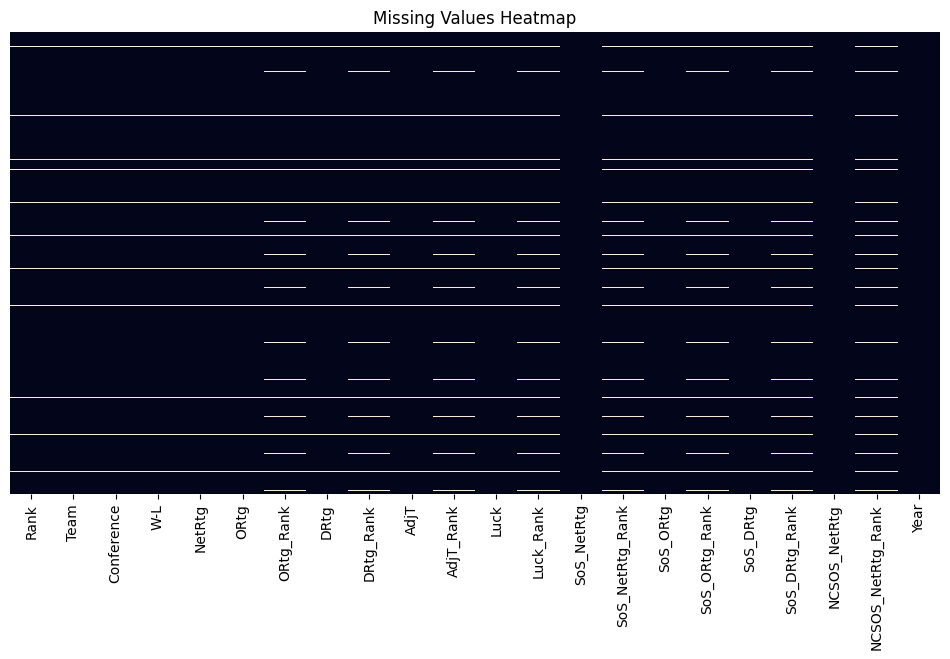

In [42]:
print(pomeroy_combined_cbb_team_ratings.head())
print()
print(pomeroy_combined_cbb_team_ratings.columns)
print()
print(pomeroy_combined_cbb_team_ratings.shape)
print()
print(pomeroy_combined_cbb_team_ratings.info())
print()
print(pomeroy_combined_cbb_team_ratings.describe())
print()
print(pomeroy_combined_cbb_team_ratings.isna().sum().sort_values(ascending=False))
print()
plt.figure(figsize=(12, 6))
sns.heatmap(pomeroy_combined_cbb_team_ratings.isna(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [43]:
# Changing datatypes to Int64
int_columns = [
    'Rank', 'ORtg_Rank', 'DRtg_Rank', 'AdjT_Rank', 'Luck_Rank',
    'SoS_NetRtg_Rank', 'SoS_ORtg_Rank', 'SoS_DRtg_Rank', 'Year'
]

for col in int_columns:
    if col in pomeroy_combined_cbb_team_ratings.columns:
        print(f"Converting {col} to Int64")
        pomeroy_combined_cbb_team_ratings[col] = pd.to_numeric(
            pomeroy_combined_cbb_team_ratings[col].astype(str), errors='coerce'
        ).astype('Int64')

# Changing datatype to float64
float_columns = [
    'NetRtg', 'ORtg', 'DRtg', 'AdjT', 'Luck',
    'SoS_NetRtg', 'SoS_ORtg', 'SoS_DRtg'
]

for col in float_columns:
    if col in pomeroy_combined_cbb_team_ratings.columns:
        print(f"Converting {col} to float64")
        pomeroy_combined_cbb_team_ratings[col] = pd.to_numeric(
            pomeroy_combined_cbb_team_ratings[col].astype(str), errors='coerce'
        ).astype('float64')

# Drop all Rows with NaN in the Row 
pomeroy_combined_cbb_team_ratings = pomeroy_combined_cbb_team_ratings.dropna()

print(pomeroy_combined_cbb_team_ratings[int_columns + float_columns].dtypes)

Converting Rank to Int64
Converting ORtg_Rank to Int64
Converting DRtg_Rank to Int64
Converting AdjT_Rank to Int64
Converting Luck_Rank to Int64
Converting SoS_NetRtg_Rank to Int64
Converting SoS_ORtg_Rank to Int64
Converting SoS_DRtg_Rank to Int64
Converting Year to Int64
Converting NetRtg to float64
Converting ORtg to float64
Converting DRtg to float64
Converting AdjT to float64
Converting Luck to float64
Converting SoS_NetRtg to float64
Converting SoS_ORtg to float64
Converting SoS_DRtg to float64
Rank                 Int64
ORtg_Rank            Int64
DRtg_Rank            Int64
AdjT_Rank            Int64
Luck_Rank            Int64
SoS_NetRtg_Rank      Int64
SoS_ORtg_Rank        Int64
SoS_DRtg_Rank        Int64
Year                 Int64
NetRtg             float64
ORtg               float64
DRtg               float64
AdjT               float64
Luck               float64
SoS_NetRtg         float64
SoS_ORtg           float64
SoS_DRtg           float64
dtype: object


   Rank            Team Conference   W-L  NetRtg   ORtg  ORtg_Rank  DRtg  \
0     1      Kentucky 1        SEC  38-2   32.59  122.2          2  89.6   
1     2      Ohio St. 2        B10  31-8   30.07  118.1          6  88.1   
2     3  Michigan St. 1        B10  29-8   27.87  114.7         17  86.9   
3     4        Kansas 2        B12  32-7   26.91  114.0         23  87.1   
4     5      Syracuse 1         BE  34-3   26.04  117.7          7  91.7   

   DRtg_Rank  AdjT  ...  Luck_Rank  SoS_NetRtg  SoS_NetRtg_Rank  SoS_ORtg  \
0          7  65.4  ...         86        7.99               26     106.8   
1          4  66.9  ...        287       10.10                4     108.9   
2          2  64.3  ...        244       10.21                3     108.6   
3          3  66.3  ...        101       11.15                1     108.8   
4         16  64.4  ...         37        7.98               27     107.0   

   SoS_ORtg_Rank  SoS_DRtg  SoS_DRtg_Rank  NCSOS_NetRtg  NCSOS_NetRtg_Rank  \
0 

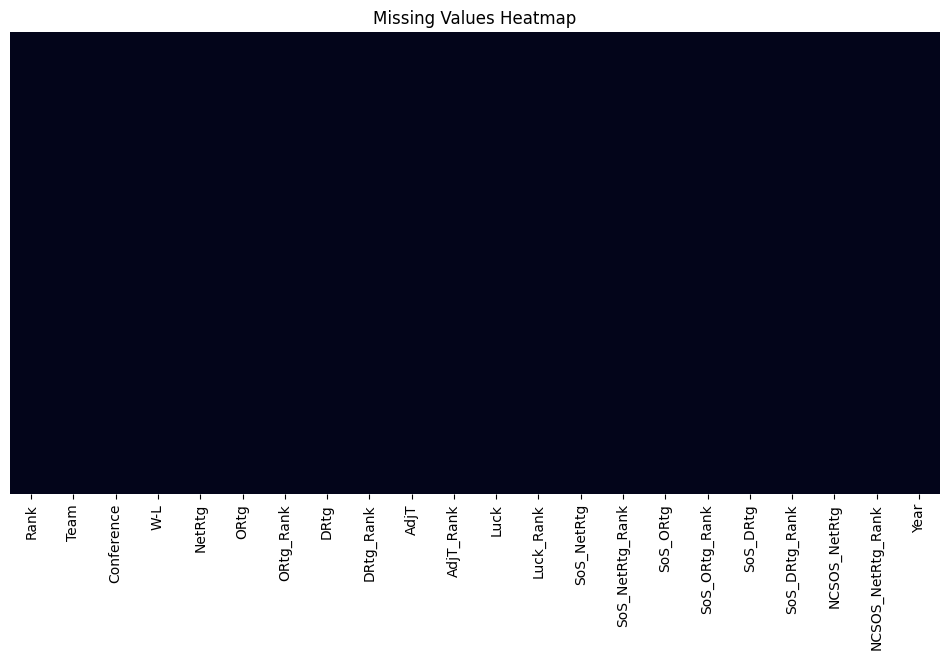

In [44]:
print(pomeroy_combined_cbb_team_ratings.head())
print()
print(pomeroy_combined_cbb_team_ratings.columns)
print()
print(pomeroy_combined_cbb_team_ratings.shape)
print()
print(pomeroy_combined_cbb_team_ratings.info())
print()
print(pomeroy_combined_cbb_team_ratings.describe())
print()
print(pomeroy_combined_cbb_team_ratings.isna().sum().sort_values(ascending=False))
print()
plt.figure(figsize=(12, 6))
sns.heatmap(pomeroy_combined_cbb_team_ratings.isna(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [45]:
output_path = r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Cleaned and Formated\pomeroy_combined_cbb_team_ratings.csv"

pomeroy_combined_cbb_team_ratings.to_csv(output_path, index=False)

In [46]:
#Bring Sports Reference Advanced School Stats into notebook (Offensive)
sportsref_cbb_2012_adv_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceAdvancedSchoolStats\2012_sports_reference_adv_school_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2013_adv_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceAdvancedSchoolStats\2013_sports_reference_adv_school_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2014_adv_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceAdvancedSchoolStats\2014_sports_reference_adv_school_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2015_adv_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceAdvancedSchoolStats\2015_sports_reference_adv_school_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2016_adv_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceAdvancedSchoolStats\2016_sports_reference_adv_school_stats.xls.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2017_adv_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceAdvancedSchoolStats\2017_sports_reference_adv_school_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2018_adv_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceAdvancedSchoolStats\2018_sports_reference_adv_school_stats.xls.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2019_adv_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceAdvancedSchoolStats\2019_sports_reference_adv_school_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2020_adv_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceAdvancedSchoolStats\2020_sports_reference_adv_school_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2021_adv_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceAdvancedSchoolStats\2021_sports_reference_adv_school_stats.xls.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2022_adv_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceAdvancedSchoolStats\2022_sports_reference_adv_school_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2023_adv_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceAdvancedSchoolStats\2023_sports_reference_adv_school_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2024_adv_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceAdvancedSchoolStats\2024_sports_reference_adv_school_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2025_adv_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceAdvancedSchoolStats\2025_sports_reference_adv_school_stats.csv", header=1, encoding="ISO-8859-1")


   Rk             School   G   W   L   W-L%    SRS    SOS  Unnamed: 8  W.1  \
0   1  Abilene Christian  32  16  16  0.500  -5.84  -2.39         NaN    8   
1   2          Air Force  32   4  28  0.125  -8.07   3.65         NaN    1   
2   3         Akron NCAA  35  28   7  0.800   3.22  -3.75         NaN   17   
3   4       Alabama NCAA  37  28   9  0.757  25.54  16.14         NaN   13   
4   5        Alabama A&M  32  10  22  0.313 -20.52  -9.93         NaN    6   

   ...   3PAr    TS%  TRB%  AST%  STL%  BLK%   eFG%  TOV%  ORB%  FT/FGA  
0  ...  0.262  0.523  50.1  51.4  14.4   8.5  0.483  18.0  31.8   0.258  
1  ...  0.485  0.525  46.6  62.9   8.7   8.1  0.501  18.7  22.7   0.225  
2  ...  0.459  0.579  52.3  58.6  10.5   9.8  0.552  14.0  32.7   0.197  
3  ...  0.466  0.596  53.5  55.4   8.1  10.1  0.566  14.3  33.7   0.283  
4  ...  0.410  0.504  49.5  54.3  11.2  11.5  0.470  18.1  35.1   0.249  

[5 rows x 34 columns]

Index(['Rk', 'School', 'G', 'W', 'L', 'W-L%', 'SRS', 'SOS', 'Un

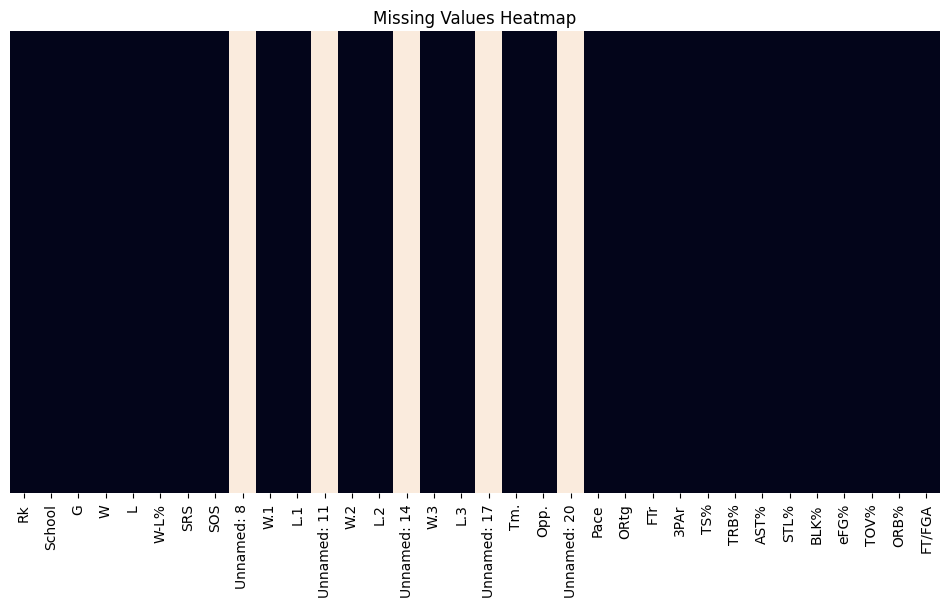

In [47]:
print(sportsref_cbb_2025_adv_school_stats.head())
print()
print(sportsref_cbb_2025_adv_school_stats.columns)
print()
print(sportsref_cbb_2025_adv_school_stats.shape)
print()
print(sportsref_cbb_2025_adv_school_stats.info())
print()
print(sportsref_cbb_2025_adv_school_stats.describe())
print()
print(sportsref_cbb_2025_adv_school_stats.isna().sum().sort_values(ascending=False))
print()
plt.figure(figsize=(12, 6))
sns.heatmap(sportsref_cbb_2025_adv_school_stats.isna(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [48]:
# Define master column set using 2025 file
expected_columns = sportsref_cbb_2025_adv_school_stats.columns.tolist()

# Initialize combined DataFrame
combined_sportsref_cbb_adv_school_stats = pd.DataFrame(columns=expected_columns + ['Season'])

# Raw season DataFrames
df_list = [
    sportsref_cbb_2012_adv_school_stats,
    sportsref_cbb_2013_adv_school_stats,
    sportsref_cbb_2014_adv_school_stats,
    sportsref_cbb_2015_adv_school_stats,
    sportsref_cbb_2016_adv_school_stats,
    sportsref_cbb_2017_adv_school_stats,
    sportsref_cbb_2018_adv_school_stats,
    sportsref_cbb_2019_adv_school_stats,
    sportsref_cbb_2020_adv_school_stats,
    sportsref_cbb_2021_adv_school_stats,
    sportsref_cbb_2022_adv_school_stats,
    sportsref_cbb_2023_adv_school_stats,
    sportsref_cbb_2024_adv_school_stats,
    sportsref_cbb_2025_adv_school_stats
]

# Seasons
seasons = list(range(2012, 2026))

# Merge process
for df_raw, season in zip(df_list, seasons):
    if df_raw.dropna(how='all').shape[1] != len(expected_columns):
        print(f"⚠️ {season}: column mismatch — found {df_raw.shape[1]}, expected {len(expected_columns)}")
        continue

    df_trimmed = df_raw.dropna(how='all').copy()
    df_trimmed = df_trimmed.iloc[1:] if not df_trimmed.iloc[0].apply(lambda x: str(x).isdigit()).any() else df_trimmed
    df_trimmed.columns = expected_columns
    df_trimmed["Season"] = season

    combined_sportsref_cbb_adv_school_stats = pd.concat(
        [combined_sportsref_cbb_adv_school_stats, df_trimmed],
        ignore_index=True
    )

C:\Users\Colt Meyer\AppData\Local\Temp\ipykernel_31888\2443452776.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_sportsref_cbb_adv_school_stats = pd.concat(


  Rk         School   G   W   L   W-L%    SRS    SOS  Unnamed: 8   W.1  ...  \
0  1      Air Force  29  13  16  0.448  -0.45   2.14         NaN   3.0  ...   
1  2          Akron  34  22  12  0.647   6.33   0.72         NaN  13.0  ...   
2  3   Alabama NCAA  33  21  12  0.636  13.76   7.18         NaN   9.0  ...   
3  4    Alabama A&M  28   7  21  0.250 -19.33 -10.79         NaN   5.0  ...   
4  5  Alabama State  31  12  19  0.387 -15.79  -9.96         NaN   9.0  ...   

     TS%  TRB%  AST%  STL%  BLK%   eFG%  TOV%  ORB% FT/FGA Season  
0  0.545  43.6  65.4  10.5  10.5  0.515  18.5  20.4  0.262   2012  
1  0.550  49.2  54.7  10.7  10.4  0.517  17.7  35.2  0.273   2012  
2  0.529  49.9  51.7  11.4  12.0  0.491  17.3  33.5  0.257   2012  
3  0.490  45.5  49.9   9.2  10.7  0.457  20.4  31.1  0.233   2012  
4  0.460  46.0  55.1  11.4   8.4  0.433  19.0  33.1  0.207   2012  

[5 rows x 35 columns]

Index(['Rk', 'School', 'G', 'W', 'L', 'W-L%', 'SRS', 'SOS', 'Unnamed: 8',
       'W.1', 'L.1'

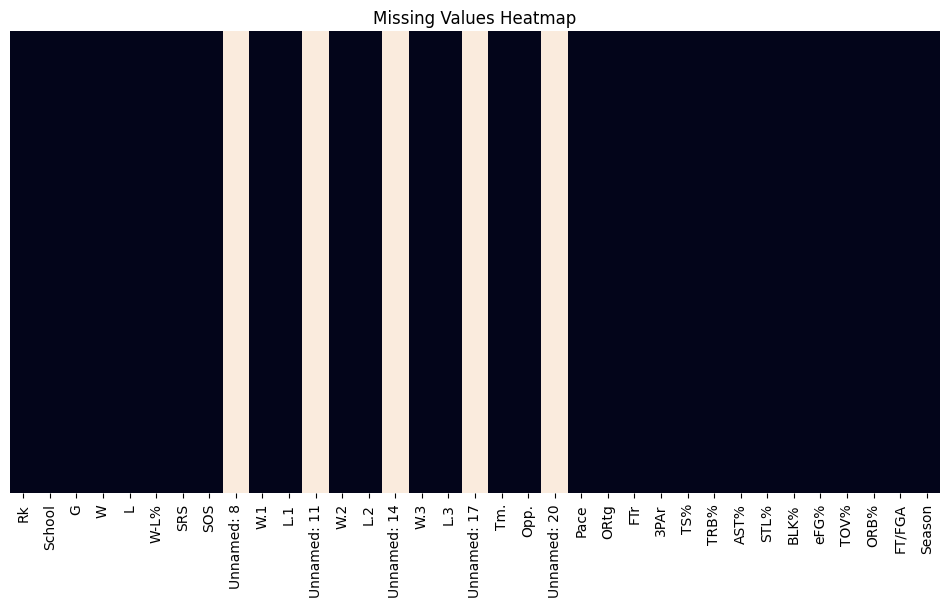

In [49]:
print(combined_sportsref_cbb_adv_school_stats.head())
print()
print(combined_sportsref_cbb_adv_school_stats.columns)
print()
print(combined_sportsref_cbb_adv_school_stats.shape)
print()
print(combined_sportsref_cbb_adv_school_stats.info())
print()
print(combined_sportsref_cbb_adv_school_stats.describe())
print()
print(combined_sportsref_cbb_adv_school_stats.isna().sum().sort_values(ascending=False))
print()
plt.figure(figsize=(12, 6))
sns.heatmap(combined_sportsref_cbb_adv_school_stats.isna(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4946 entries, 0 to 4945
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      4946 non-null   Int64  
 1   School  4946 non-null   object 
 2   G       4946 non-null   object 
 3   W       4946 non-null   object 
 4   L       4946 non-null   object 
 5   W-L%    4946 non-null   float64
 6   SRS     4946 non-null   float64
 7   SOS     4946 non-null   float64
 8   W.1     4946 non-null   float64
 9   L.1     4946 non-null   float64
 10  W.2     4946 non-null   float64
 11  L.2     4946 non-null   float64
 12  W.3     4946 non-null   float64
 13  L.3     4946 non-null   float64
 14  Tm.     4946 non-null   object 
 15  Opp.    4946 non-null   object 
 16  Pace    4946 non-null   float64
 17  ORtg    4946 non-null   float64
 18  FTr     4946 non-null   float64
 19  3PAr    4946 non-null   float64
 20  TS%     4946 non-null   float64
 21  TRB%    4946 non-null   float64
 22  

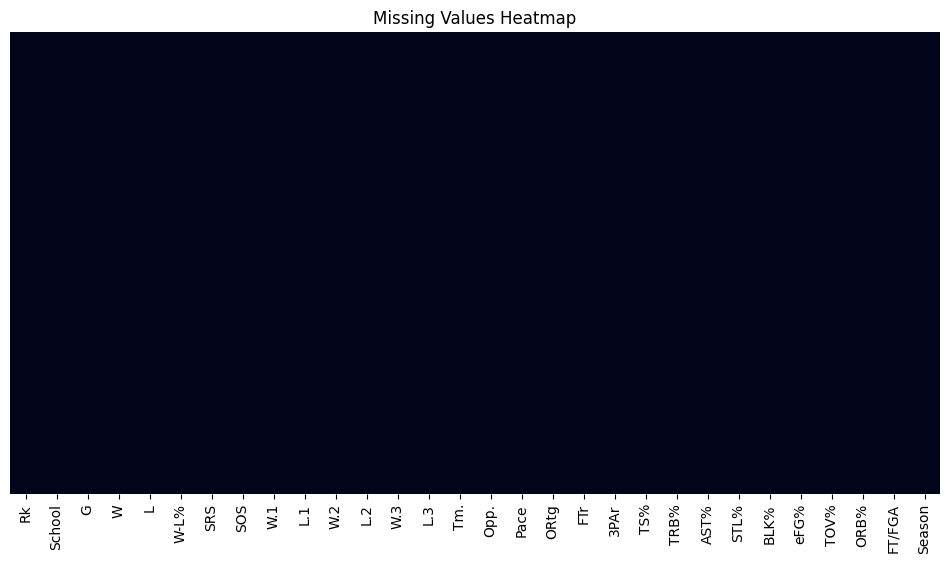

In [50]:
combined_sportsref_cbb_adv_school_stats['Season'] = pd.to_numeric(
    combined_sportsref_cbb_adv_school_stats['Season'], errors='coerce'
).astype('Int64')

combined_sportsref_cbb_adv_school_stats['Rk'] = pd.to_numeric(
    combined_sportsref_cbb_adv_school_stats['Rk'], errors='coerce'
).astype('Int64')

combined_sportsref_cbb_adv_school_stats.dropna(axis=1, how='all', inplace=True)

combined_sportsref_cbb_adv_school_stats.fillna(0, inplace=True)

print(combined_sportsref_cbb_adv_school_stats.info())
print()
plt.figure(figsize=(12, 6))
sns.heatmap(combined_sportsref_cbb_adv_school_stats.isna(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [51]:
output_path = r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Cleaned and Formated\combined_sportsref_cbb_adv_school_stats.csv"

combined_sportsref_cbb_adv_school_stats.to_csv(output_path, index=False)

In [52]:
# Bring Sports Reference Basic Opponent School Stats into notebook (Defensive)
sportsref_cbb_2012_basic_opponent_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceBasicOpponentStats\2012_sports_reference_basic_opp_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2013_basic_opponent_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceBasicOpponentStats\2013_sports_reference_basic_opp_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2014_basic_opponent_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceBasicOpponentStats\2014_sports_reference_basic_opp_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2015_basic_opponent_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceBasicOpponentStats\2015_sports_reference_basic_opp_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2016_basic_opponent_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceBasicOpponentStats\2016_sports_reference_basic_opp_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2017_basic_opponent_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceBasicOpponentStats\2017_sports_reference_basic_opp_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2018_basic_opponent_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceBasicOpponentStats\2018_sports_reference_basic_opp_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2019_basic_opponent_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceBasicOpponentStats\2019_sports_reference_basic_opp_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2020_basic_opponent_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceBasicOpponentStats\2020_sports_reference_basic_opp_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2021_basic_opponent_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceBasicOpponentStats\2021_sports_reference_basic_opp_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2022_basic_opponent_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceBasicOpponentStats\2022_sports_reference_basic_opp_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2023_basic_opponent_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceBasicOpponentStats\2023_sports_reference_basic_opp_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2024_basic_opponent_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceBasicOpponentStats\2024_sports_reference_basic_opp_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2025_basic_opponent_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceBasicOpponentStats\2025_sports_reference_basic_opp_stats.csv", header=1, encoding="ISO-8859-1")


In [53]:
# Define master column set using 2025 file
expected_columns = sportsref_cbb_2025_basic_opponent_school_stats.columns.tolist()

# Initialize combined DataFrame
combined_sportsref_cbb_basic_opponent_school_stats = pd.DataFrame(columns=expected_columns + ['Season'])

# Raw season DataFrames
df_list = [
    sportsref_cbb_2012_basic_opponent_school_stats,
    sportsref_cbb_2013_basic_opponent_school_stats,
    sportsref_cbb_2014_basic_opponent_school_stats,
    sportsref_cbb_2015_basic_opponent_school_stats,
    sportsref_cbb_2016_basic_opponent_school_stats,
    sportsref_cbb_2017_basic_opponent_school_stats,
    sportsref_cbb_2018_basic_opponent_school_stats,
    sportsref_cbb_2019_basic_opponent_school_stats,
    sportsref_cbb_2020_basic_opponent_school_stats,
    sportsref_cbb_2021_basic_opponent_school_stats,
    sportsref_cbb_2022_basic_opponent_school_stats,
    sportsref_cbb_2023_basic_opponent_school_stats,
    sportsref_cbb_2024_basic_opponent_school_stats,
    sportsref_cbb_2025_basic_opponent_school_stats
]

# Seasons
seasons = list(range(2012, 2026))

# Merge process
for df_raw, season in zip(df_list, seasons):
    if df_raw.dropna(how='all').shape[1] != len(expected_columns):
        print(f"⚠️ {season}: column mismatch — found {df_raw.shape[1]}, expected {len(expected_columns)}")
        continue

    df_trimmed = df_raw.dropna(how='all').copy()
    df_trimmed = df_trimmed.iloc[1:] if not df_trimmed.iloc[0].apply(lambda x: str(x).isdigit()).any() else df_trimmed
    df_trimmed.columns = expected_columns
    df_trimmed["Season"] = season

    combined_sportsref_cbb_basic_opponent_school_stats = pd.concat(
        [combined_sportsref_cbb_basic_opponent_school_stats, df_trimmed],
        ignore_index=True
    )

C:\Users\Colt Meyer\AppData\Local\Temp\ipykernel_31888\3131306875.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_sportsref_cbb_basic_opponent_school_stats = pd.concat(


  Rk         School   G   W   L   W-L%    SRS    SOS  Unnamed: 8   W.1  ...  \
0  1      Air Force  29  13  16  0.448  -0.45   2.14         NaN   3.0  ...   
1  2          Akron  34  22  12  0.647   6.33   0.72         NaN  13.0  ...   
2  3   Alabama NCAA  33  21  12  0.636  13.76   7.18         NaN   9.0  ...   
3  4    Alabama A&M  28   7  21  0.250 -19.33 -10.79         NaN   5.0  ...   
4  5  Alabama State  31  12  19  0.387 -15.79  -9.96         NaN   9.0  ...   

   FTA    FT%  ORB   TRB  AST  STL  BLK  TOV   PF Season  
0  548  0.706  299   993  369  189   75  407  519   2012  
1  651  0.691  400  1133  423  218  116  476  637   2012  
2  654  0.645  373  1072  343  181  118  442  539   2012  
3  756  0.657  318  1018  300  227  115  402  501   2012  
4  655  0.655  345  1155  408  240  124  485  579   2012  

[5 rows x 39 columns]

Index(['Rk', 'School', 'G', 'W', 'L', 'W-L%', 'SRS', 'SOS', 'Unnamed: 8',
       'W.1', 'L.1', 'Unnamed: 11', 'W.2', 'L.2', 'Unnamed: 14', 'W.3', '

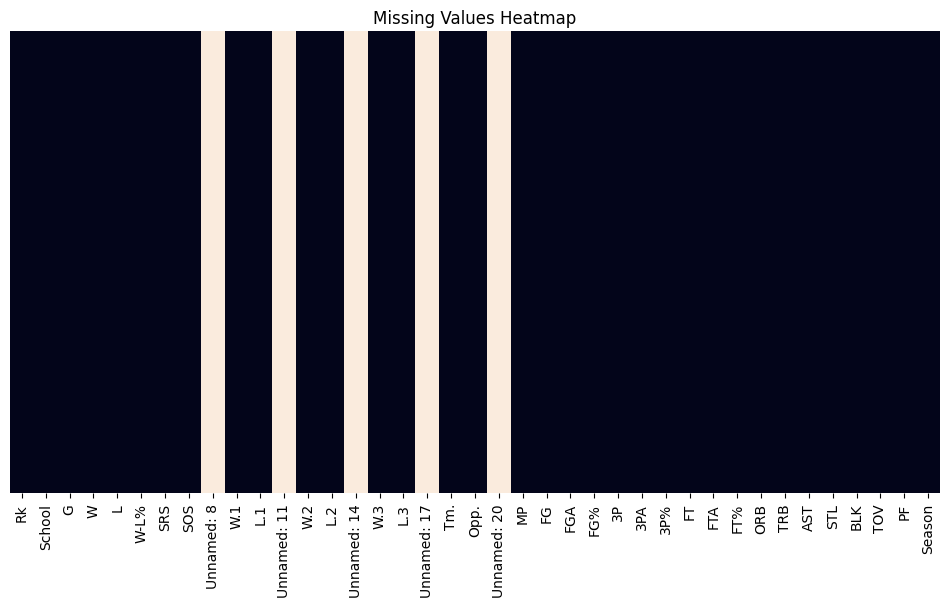

In [54]:
print(combined_sportsref_cbb_basic_opponent_school_stats.head())
print()
print(combined_sportsref_cbb_basic_opponent_school_stats.columns)
print()
print(combined_sportsref_cbb_basic_opponent_school_stats.shape)
print()
print(combined_sportsref_cbb_basic_opponent_school_stats.info())
print()
print(combined_sportsref_cbb_basic_opponent_school_stats.describe())
print()
print(combined_sportsref_cbb_basic_opponent_school_stats.isna().sum().sort_values(ascending=False))
print()
plt.figure(figsize=(12, 6))
sns.heatmap(combined_sportsref_cbb_basic_opponent_school_stats.isna(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4946 entries, 0 to 4945
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      4946 non-null   Int64  
 1   School  4946 non-null   object 
 2   G       4946 non-null   object 
 3   W       4946 non-null   object 
 4   L       4946 non-null   object 
 5   W-L%    4946 non-null   float64
 6   SRS     4946 non-null   float64
 7   SOS     4946 non-null   float64
 8   W.1     4946 non-null   float64
 9   L.1     4946 non-null   float64
 10  W.2     4946 non-null   float64
 11  L.2     4946 non-null   float64
 12  W.3     4946 non-null   float64
 13  L.3     4946 non-null   float64
 14  Tm.     4946 non-null   object 
 15  Opp.    4946 non-null   object 
 16  MP      4946 non-null   object 
 17  FG      4946 non-null   object 
 18  FGA     4946 non-null   object 
 19  FG%     4946 non-null   float64
 20  3P      4946 non-null   object 
 21  3PA     4946 non-null   object 
 22  

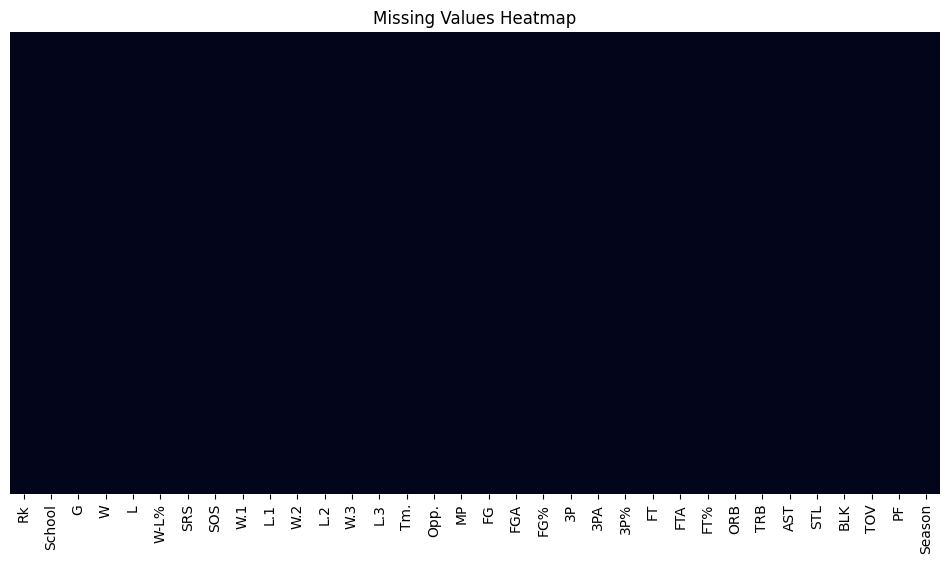

In [55]:
combined_sportsref_cbb_basic_opponent_school_stats['Season'] = pd.to_numeric(
    combined_sportsref_cbb_basic_opponent_school_stats['Season'], errors='coerce'
).astype('Int64')

combined_sportsref_cbb_basic_opponent_school_stats['Rk'] = pd.to_numeric(
    combined_sportsref_cbb_basic_opponent_school_stats['Rk'], errors='coerce'
).astype('Int64')

combined_sportsref_cbb_basic_opponent_school_stats.dropna(axis=1, how='all', inplace=True)

combined_sportsref_cbb_basic_opponent_school_stats.fillna(0, inplace=True)

print(combined_sportsref_cbb_basic_opponent_school_stats.info())
print()
plt.figure(figsize=(12, 6))
sns.heatmap(combined_sportsref_cbb_basic_opponent_school_stats.isna(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [56]:
# Changing datatype to float64
all_columns = combined_sportsref_cbb_basic_opponent_school_stats.columns.tolist()
float_columns = ['FG', 'FGA', 'FT', 'FTA', 'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', '3P', '3PA']
unchanged_columns = ['Rk', 'G', 'W', 'L', 'Tm.', 'Opp.', 'MP', 'Season']  # Add any others you want untouched
modification_candidates = [col for col in all_columns if col not in unchanged_columns]

for col in float_columns:
    if col in combined_sportsref_cbb_basic_opponent_school_stats.columns:
        print(f"Converting {col} to float64")
        combined_sportsref_cbb_basic_opponent_school_stats[col] = pd.to_numeric(
            combined_sportsref_cbb_basic_opponent_school_stats[col].astype(str), errors='coerce'
        ).astype('float64')

# Drop all Rows with NaN in the Row 
combined_sportsref_cbb_basic_opponent_school_stats = combined_sportsref_cbb_basic_opponent_school_stats.dropna()

print(combined_sportsref_cbb_basic_opponent_school_stats[unchanged_columns + float_columns].dtypes)

Converting FG to float64
Converting FGA to float64
Converting FT to float64
Converting FTA to float64
Converting ORB to float64
Converting TRB to float64
Converting AST to float64
Converting STL to float64
Converting BLK to float64
Converting TOV to float64
Converting PF to float64
Converting 3P to float64
Converting 3PA to float64
Rk          Int64
G          object
W          object
L          object
Tm.        object
Opp.       object
MP         object
Season      Int64
FG        float64
FGA       float64
FT        float64
FTA       float64
ORB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
3P        float64
3PA       float64
dtype: object


   Rk         School   G   W   L   W-L%    SRS    SOS   W.1   L.1  ...    FTA  \
0   1      Air Force  29  13  16  0.448  -0.45   2.14   3.0  11.0  ...  548.0   
1   2          Akron  34  22  12  0.647   6.33   0.72  13.0   3.0  ...  651.0   
2   3   Alabama NCAA  33  21  12  0.636  13.76   7.18   9.0   7.0  ...  654.0   
3   4    Alabama A&M  28   7  21  0.250 -19.33 -10.79   5.0  13.0  ...  756.0   
4   5  Alabama State  31  12  19  0.387 -15.79  -9.96   9.0   9.0  ...  655.0   

     FT%    ORB     TRB    AST    STL    BLK    TOV     PF  Season  
0  0.706  299.0   993.0  369.0  189.0   75.0  407.0  519.0    2012  
1  0.691  400.0  1133.0  423.0  218.0  116.0  476.0  637.0    2012  
2  0.645  373.0  1072.0  343.0  181.0  118.0  442.0  539.0    2012  
3  0.657  318.0  1018.0  300.0  227.0  115.0  402.0  501.0    2012  
4  0.655  345.0  1155.0  408.0  240.0  124.0  485.0  579.0    2012  

[5 rows x 34 columns]

Index(['Rk', 'School', 'G', 'W', 'L', 'W-L%', 'SRS', 'SOS', 'W.1', 'L.1',
 

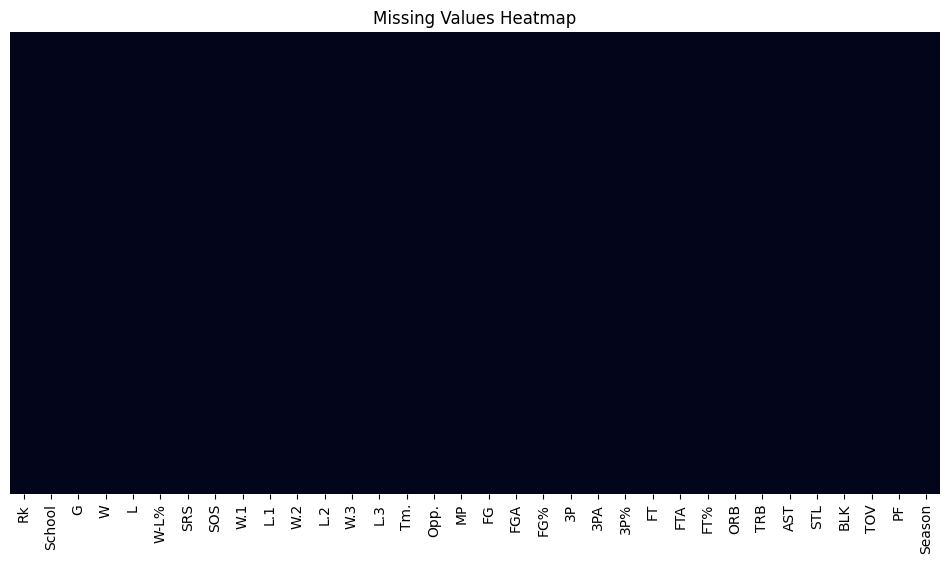

In [57]:
print(combined_sportsref_cbb_basic_opponent_school_stats.head())
print()
print(combined_sportsref_cbb_basic_opponent_school_stats.columns)
print()
print(combined_sportsref_cbb_basic_opponent_school_stats.shape)
print()
print(combined_sportsref_cbb_basic_opponent_school_stats.info())
print()
print(combined_sportsref_cbb_basic_opponent_school_stats.describe())
print()
print(combined_sportsref_cbb_basic_opponent_school_stats.isna().sum().sort_values(ascending=False))
print()
plt.figure(figsize=(12, 6))
sns.heatmap(combined_sportsref_cbb_basic_opponent_school_stats.isna(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [58]:
output_path = r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Cleaned and Formated\combined_sportsref_cbb_basic_opponent_school_stats.csv"

combined_sportsref_cbb_basic_opponent_school_stats.to_csv(output_path, index=False)

In [59]:
# Bring Sports Reference Advanced Opponent School Stats into notebook (Defensive)
sportsref_cbb_2012_adv_opponent_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\Sports ReferenceAdvancedOpponentStats\2012_sports_reference_adv_opp_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2013_adv_opponent_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\Sports ReferenceAdvancedOpponentStats\2013_sports_reference_adv_opp_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2014_adv_opponent_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\Sports ReferenceAdvancedOpponentStats\2014_sports_reference_adv_opp_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2015_adv_opponent_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\Sports ReferenceAdvancedOpponentStats\2015_sports_reference_adv_opp_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2016_adv_opponent_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\Sports ReferenceAdvancedOpponentStats\2016_sports_reference_adv_opp_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2017_adv_opponent_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\Sports ReferenceAdvancedOpponentStats\2017_sports_reference_adv_opp_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2018_adv_opponent_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\Sports ReferenceAdvancedOpponentStats\2018_sports_reference_adv_opp_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2019_adv_opponent_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\Sports ReferenceAdvancedOpponentStats\2019_sports_reference_adv_opp_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2020_adv_opponent_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\Sports ReferenceAdvancedOpponentStats\2020_sports_reference_adv_opp_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2021_adv_opponent_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\Sports ReferenceAdvancedOpponentStats\2021_sports_reference_adv_opp_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2022_adv_opponent_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\Sports ReferenceAdvancedOpponentStats\2022_sports_reference_adv_opp_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2023_adv_opponent_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\Sports ReferenceAdvancedOpponentStats\2023_sports_reference_adv_opp_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2024_adv_opponent_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\Sports ReferenceAdvancedOpponentStats\2024_sports_reference_adv_opp_stats.csv", header=1, encoding="ISO-8859-1")
sportsref_cbb_2025_adv_opponent_school_stats = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\Sports ReferenceAdvancedOpponentStats\2025_sports_reference_adv_opp_stats.csv", header=1, encoding="ISO-8859-1")


In [60]:
# Define master column set using 2025 file
expected_columns = sportsref_cbb_2025_adv_opponent_school_stats.columns.tolist()

# Initialize combined DataFrame
combined_sportsref_cbb_adv_opponent_school_stats = pd.DataFrame(columns=expected_columns + ['Season'])

# Raw season DataFrames
df_list = [
    sportsref_cbb_2012_adv_opponent_school_stats,
    sportsref_cbb_2013_adv_opponent_school_stats,
    sportsref_cbb_2014_adv_opponent_school_stats,
    sportsref_cbb_2015_adv_opponent_school_stats,
    sportsref_cbb_2016_adv_opponent_school_stats,
    sportsref_cbb_2017_adv_opponent_school_stats,
    sportsref_cbb_2018_adv_opponent_school_stats,
    sportsref_cbb_2019_adv_opponent_school_stats,
    sportsref_cbb_2020_adv_opponent_school_stats,
    sportsref_cbb_2021_adv_opponent_school_stats,
    sportsref_cbb_2022_adv_opponent_school_stats,
    sportsref_cbb_2023_adv_opponent_school_stats,
    sportsref_cbb_2024_adv_opponent_school_stats,
    sportsref_cbb_2025_adv_opponent_school_stats
]

# Seasons
seasons = list(range(2012, 2026))

# Merge process
for df_raw, season in zip(df_list, seasons):
    if df_raw.dropna(how='all').shape[1] != len(expected_columns):
        print(f"⚠️ {season}: column mismatch — found {df_raw.shape[1]}, expected {len(expected_columns)}")
        continue

    df_trimmed = df_raw.dropna(how='all').copy()
    df_trimmed = df_trimmed.iloc[1:] if not df_trimmed.iloc[0].apply(lambda x: str(x).isdigit()).any() else df_trimmed
    df_trimmed.columns = expected_columns
    df_trimmed["Season"] = season

    combined_sportsref_cbb_adv_opponent_school_stats = pd.concat(
        [combined_sportsref_cbb_adv_opponent_school_stats, df_trimmed],
        ignore_index=True
    )

C:\Users\Colt Meyer\AppData\Local\Temp\ipykernel_31888\3813635789.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_sportsref_cbb_adv_opponent_school_stats = pd.concat(


   Rk         School   G   W   L   W-L%    SRS    SOS   W.1   L.1  ...    TS%  \
0   1      Air Force  29  13  16  0.448  -0.45   2.14   3.0  11.0  ...  0.517   
1   2          Akron  34  22  12  0.647   6.33   0.72  13.0   3.0  ...  0.501   
2   3   Alabama NCAA  33  21  12  0.636  13.76   7.18   9.0   7.0  ...  0.474   
3   4    Alabama A&M  28   7  21  0.250 -19.33 -10.79   5.0  13.0  ...  0.530   
4   5  Alabama State  31  12  19  0.387 -15.79  -9.96   9.0   9.0  ...  0.515   

   TRB%  AST%  STL%  BLK%   eFG%  TOV%  ORB%  FT/FGA  Season  
0  56.4  60.9  10.3   9.2  0.477  19.0  33.7   0.262    2012  
1  50.8  52.3   9.4   8.8  0.465  17.6  36.4   0.234    2012  
2  50.1  51.5   8.7   9.4  0.437  17.9  34.3   0.247    2012  
3  54.5  45.0  11.7  10.8  0.491  17.8  37.4   0.333    2012  
4  54.0  57.5  11.6  11.3  0.481  20.0  37.2   0.264    2012  

[5 rows x 30 columns]

Index(['Rk', 'School', 'G', 'W', 'L', 'W-L%', 'SRS', 'SOS', 'W.1', 'L.1',
       'W.2', 'L.2', 'W.3', 'L.3', 'T

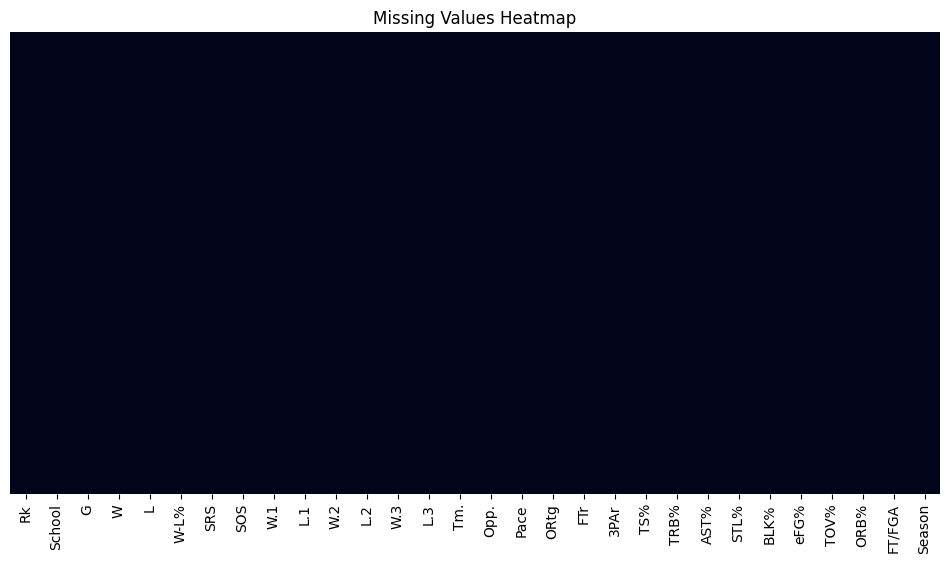

In [61]:
combined_sportsref_cbb_adv_opponent_school_stats['Season'] = pd.to_numeric(
    combined_sportsref_cbb_adv_opponent_school_stats['Season'], errors='coerce'
).astype('Int64')

combined_sportsref_cbb_adv_opponent_school_stats['Rk'] = pd.to_numeric(
    combined_sportsref_cbb_adv_opponent_school_stats['Rk'], errors='coerce'
).astype('Int64')

combined_sportsref_cbb_adv_opponent_school_stats.dropna(axis=1, how='all', inplace=True)

combined_sportsref_cbb_adv_opponent_school_stats.fillna(0, inplace=True)

print(combined_sportsref_cbb_adv_opponent_school_stats.head())
print()
print(combined_sportsref_cbb_adv_opponent_school_stats.columns)
print()
print(combined_sportsref_cbb_adv_opponent_school_stats.shape)
print()
print(combined_sportsref_cbb_adv_opponent_school_stats.info())
print()
print(combined_sportsref_cbb_adv_opponent_school_stats.describe())
print()
print(combined_sportsref_cbb_adv_opponent_school_stats.isna().sum().sort_values(ascending=False))
print()
plt.figure(figsize=(12, 6))
sns.heatmap(combined_sportsref_cbb_adv_opponent_school_stats.isna(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [62]:
output_path = r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Cleaned and Formated\combined_sportsref_cbb_adv_opponent_school_stats.csv"

combined_sportsref_cbb_adv_opponent_school_stats.to_csv(output_path, index=False)

In [63]:
# Bring Sports Reference Converence Tournament Results into notebook (Conference Champions Regular Season and Tournament)
sportsref_cbb_2012_conference_tournament_results = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceConferenceTournamentResults\2012_sports_reference_conf_tourn_results.csv", header=0, encoding="ISO-8859-1")
sportsref_cbb_2013_conference_tournament_results = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceConferenceTournamentResults\2013_sports_reference_conf_tourn_results.csv", header=0, encoding="ISO-8859-1")
sportsref_cbb_2014_conference_tournament_results = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceConferenceTournamentResults\2014_sports_reference_conf_tourn_results.csv", header=0, encoding="ISO-8859-1")
sportsref_cbb_2015_conference_tournament_results = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceConferenceTournamentResults\2015_sports_reference_conf_tourn_results.csv", header=0, encoding="ISO-8859-1")
sportsref_cbb_2016_conference_tournament_results = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceConferenceTournamentResults\2016_sports_reference_conf_tourn_results.csv", header=0, encoding="ISO-8859-1")
sportsref_cbb_2017_conference_tournament_results = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceConferenceTournamentResults\2017_sports_reference_conf_tourn_results.csv", header=0, encoding="ISO-8859-1")
sportsref_cbb_2018_conference_tournament_results = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceConferenceTournamentResults\2018_sports_reference_conf_tourn_results.csv", header=0, encoding="ISO-8859-1")
sportsref_cbb_2019_conference_tournament_results = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceConferenceTournamentResults\2019_sports_reference_conf_tourn_results.csv", header=0, encoding="ISO-8859-1")
sportsref_cbb_2020_conference_tournament_results = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceConferenceTournamentResults\2020_sports_reference_conf_tourn_results.csv", header=0, encoding="ISO-8859-1")
sportsref_cbb_2021_conference_tournament_results = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceConferenceTournamentResults\2021_sports_reference_conf_tourn_results.csv", header=0, encoding="ISO-8859-1")
sportsref_cbb_2022_conference_tournament_results = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceConferenceTournamentResults\2022_sports_reference_conf_tourn_results.csv", header=0, encoding="ISO-8859-1")
sportsref_cbb_2023_conference_tournament_results = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceConferenceTournamentResults\2023_sports_reference_conf_tourn_results.csv", header=0, encoding="ISO-8859-1")
sportsref_cbb_2024_conference_tournament_results = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceConferenceTournamentResults\2024_sports_reference_conf_tourn_results.csv", header=0, encoding="ISO-8859-1")
sportsref_cbb_2025_conference_tournament_results = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\SportsReferenceConferenceTournamentResults\2025_sports_reference_conf_tourn_results.csv", header=0, encoding="ISO-8859-1")


In [64]:
# Define master column set using 2025 file
expected_columns = sportsref_cbb_2025_conference_tournament_results.columns.tolist()

# Initialize combined DataFrame
combined_sportsref_cbb_conference_tournament_results = pd.DataFrame(columns=expected_columns + ['Season'])

# Raw season DataFrames
df_list = [
    sportsref_cbb_2012_conference_tournament_results,
    sportsref_cbb_2013_conference_tournament_results,
    sportsref_cbb_2014_conference_tournament_results,
    sportsref_cbb_2015_conference_tournament_results,
    sportsref_cbb_2016_conference_tournament_results,
    sportsref_cbb_2017_conference_tournament_results,
    sportsref_cbb_2018_conference_tournament_results,
    sportsref_cbb_2019_conference_tournament_results,
    sportsref_cbb_2020_conference_tournament_results,
    sportsref_cbb_2021_conference_tournament_results,
    sportsref_cbb_2022_conference_tournament_results,
    sportsref_cbb_2023_conference_tournament_results,
    sportsref_cbb_2024_conference_tournament_results,
    sportsref_cbb_2025_conference_tournament_results
]

# Seasons
seasons = list(range(2012, 2026))

# Merge process
for df_raw, season in zip(df_list, seasons):
    if df_raw.dropna(how='all').shape[1] != len(expected_columns):
        print(f"⚠️ {season}: column mismatch — found {df_raw.shape[1]}, expected {len(expected_columns)}")
        continue

    df_trimmed = df_raw.dropna(how='all').copy()
    df_trimmed = df_trimmed.iloc[1:] if not df_trimmed.iloc[0].apply(lambda x: str(x).isdigit()).any() else df_trimmed
    df_trimmed.columns = expected_columns
    df_trimmed["Season"] = season

    combined_sportsref_cbb_conference_tournament_results = pd.concat(
        [combined_sportsref_cbb_conference_tournament_results, df_trimmed],
        ignore_index=True
    )

                Conference                        Dates            Champ  \
0  America East Conference  Mar 01, 2012 - Mar 10, 2012          Vermont   
1   Atlantic 10 Conference  Mar 06, 2012 - Mar 11, 2012  St. Bonaventure   
2  Atlantic Sun Conference  Feb 29, 2012 - Mar 03, 2012          Belmont   
3        Big 12 Conference  Mar 07, 2012 - Mar 10, 2012         Missouri   
4      Big East Conference  Mar 06, 2012 - Mar 10, 2012       Louisville   

         Runner-up Season  
0      Stony Brook   2012  
1           Xavier   2012  
2  Fla. Gulf Coast   2012  
3           Baylor   2012  
4       Cincinnati   2012  

Index(['Conference', 'Dates', 'Champ', 'Runner-up', 'Season'], dtype='object')

(406, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Conference  406 non-null    object
 1   Dates       406 non-null    object
 2   Champ       406

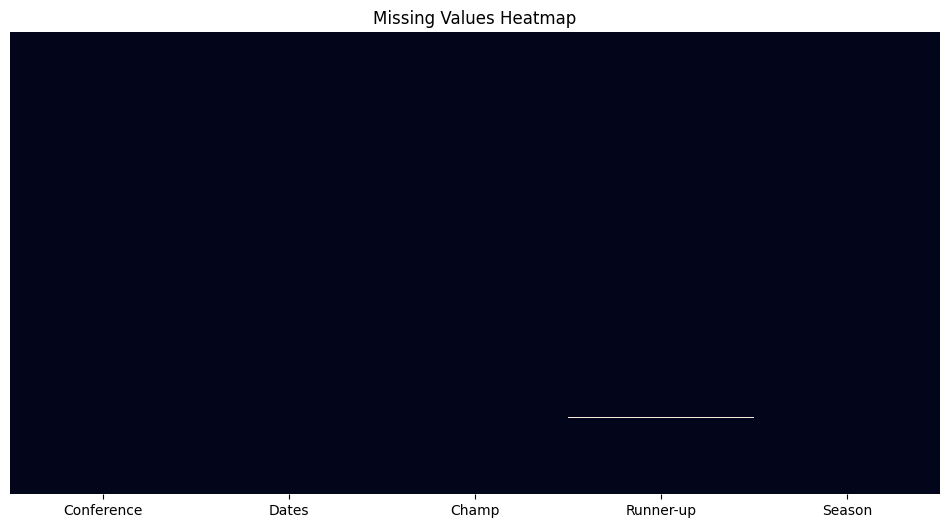

In [65]:
combined_sportsref_cbb_conference_tournament_results.dropna(axis=1, how='all', inplace=True)

print(combined_sportsref_cbb_conference_tournament_results.head())
print()
print(combined_sportsref_cbb_conference_tournament_results.columns)
print()
print(combined_sportsref_cbb_conference_tournament_results.shape)
print()
print(combined_sportsref_cbb_conference_tournament_results.info())
print()
print(combined_sportsref_cbb_conference_tournament_results.describe())
print()
print(combined_sportsref_cbb_conference_tournament_results.isna().sum().sort_values(ascending=False))
print()
nan_cols = combined_sportsref_cbb_basic_school_stats.columns[combined_sportsref_cbb_basic_school_stats.isna().any()]
print("Columns with NaN:", list(nan_cols))
print()
plt.figure(figsize=(12, 6))
sns.heatmap(combined_sportsref_cbb_conference_tournament_results.isna(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [66]:
output_path = r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Cleaned and Formated\combined_sportsref_cbb_conference_tournament_results.csv"

combined_sportsref_cbb_conference_tournament_results.to_csv(output_path, index=False)

In [67]:
# Load CSVs from Kaggle March Madness Challenge
tournament_locations_2008_to_2025 = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\Tournament Locations.csv", header=0, encoding="ISO-8859-1")
tournament_results_2008_to_2025 = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Data Sets Raw\Tournament Matchups.csv", header=0, encoding="ISO-8859-1")

   YEAR  BY YEAR NO  BY ROUND NO  TEAM NO           TEAM  SEED  ROUND  \
0  2025        2162         2166     1141         Auburn     1     64   
1  2025        2161         2165     1145    Alabama St.    16     64   
2  2025        2160         2164     1141         Auburn     1     64   
3  2025        2159         2163     1099  Saint Francis    16     64   
4  2025        2158         2162     1119     Louisville     8     64   

  COLLEGE CITY COLLEGE STATE      COLLEGE LOCATION  ...  \
0       Auburn       Alabama       Auburn Alabama   ...   
1   Montgomery       Alabama    Montgomery Alabama  ...   
2       Auburn       Alabama       Auburn Alabama   ...   
3      Loretto  Pennsylvania  Loretto Pennsylvania  ...   
4   Louisville      Kentucky  Louisville Kentucky   ...   

  DAYLIGHT SAVINGS TIME.1  GAME LATITUDE  GAME LONGITUDE  \
0                    True      38.040584      -84.503716   
1                    True      38.040584      -84.503716   
2                    True 

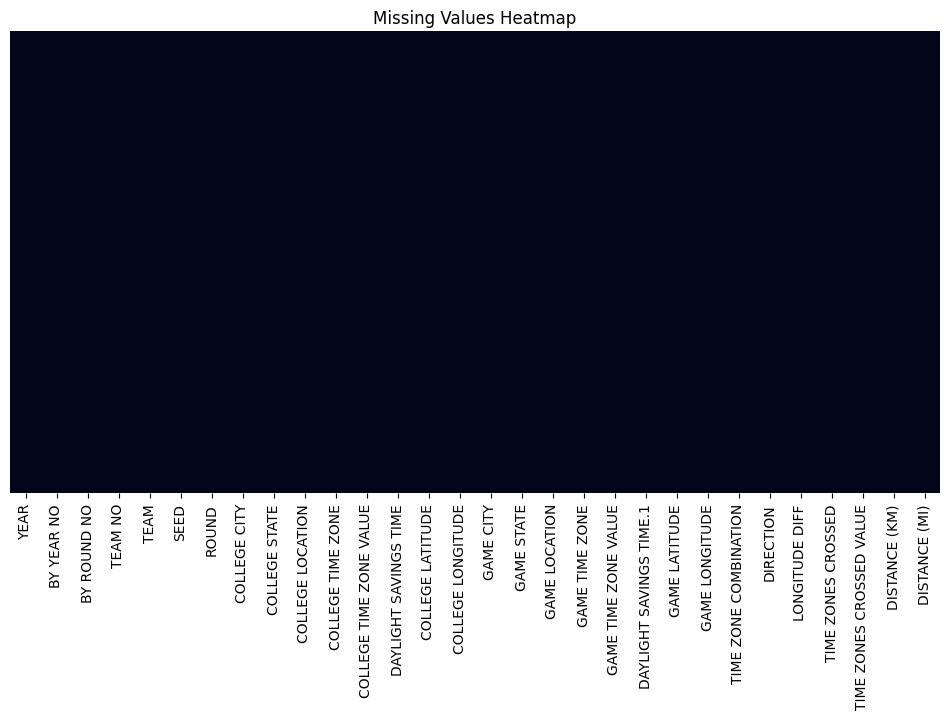

In [68]:
print(tournament_locations_2008_to_2025.head())
print()
print(tournament_locations_2008_to_2025.columns)
print()
print(tournament_locations_2008_to_2025.shape)
print()
print(tournament_locations_2008_to_2025.info())
print()
print(tournament_locations_2008_to_2025.describe())
print()
print(tournament_locations_2008_to_2025.isna().sum().sort_values(ascending=False))
print()
nan_cols = tournament_locations_2008_to_2025.columns[tournament_locations_2008_to_2025.isna().any()]
print("Columns with NaN:", list(nan_cols))
print()
plt.figure(figsize=(12, 6))
sns.heatmap(tournament_locations_2008_to_2025.isna(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

   YEAR  BY YEAR NO  TEAM NO              TEAM  SEED  CURRENT ROUND  SCORE  \
0  2025      2140.0     1145       Alabama St.    16             68     68   
1  2025      2139.0     1099     Saint Francis    16             68     70   
2  2025      2138.0     1104    North Carolina    11             68     95   
3  2025      2137.0     1097     San Diego St.    11             68     68   
4  2025      2136.0     1108  Mount St. Mary's    16             68     83   

         Opponent  Opponenet Score  Opponent Seed  Result  
0   Saint Francis               70             16       0  
1     Alabama St.               68             16       1  
2   San Diego St.               68             11       1  
3  North Carolina               95             11       0  
4        American               72             16       1  

Index(['YEAR', 'BY YEAR NO', 'TEAM NO', 'TEAM', 'SEED', 'CURRENT ROUND',
       'SCORE', 'Opponent', 'Opponenet Score', 'Opponent Seed', 'Result'],
      dtype='object')


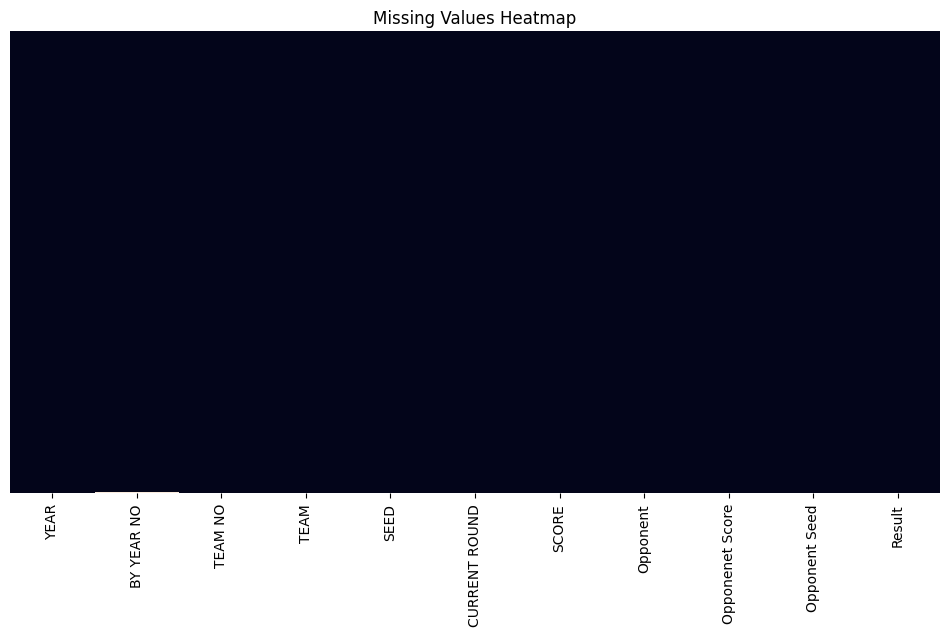

In [69]:
print(tournament_results_2008_to_2025.head())
print()
print(tournament_results_2008_to_2025.columns)
print()
print(tournament_results_2008_to_2025.shape)
print()
print(tournament_results_2008_to_2025.info())
print()
print(tournament_results_2008_to_2025.describe())
print()
print(tournament_results_2008_to_2025.isna().sum().sort_values(ascending=False))
print()
nan_cols = tournament_results_2008_to_2025.columns[tournament_results_2008_to_2025.isna().any()]
print("Columns with NaN:", list(nan_cols))
print()
plt.figure(figsize=(12, 6))
sns.heatmap(tournament_results_2008_to_2025.isna(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

# Second Cleaning and Formatting Run 
### Elimination of variables and combining or dataframes
#### Data Sets
##### tournament_results_2008_to_2025
##### pomeroy_combined_cbb_team_ratings
##### evan_miya_all_years
##### combined_sportsref_cbb_conference_tournament_results
##### combined_sportsref_cbb_coaches_stats
##### combined_sportsref_cbb_basic_school_stats
##### combined_sportsref_cbb_adv_school_stats
##### combined_sportsref_cbb_basic_opponent_school_stats
##### combined_sportsref_cbb_adv_opponent_school_stats
##### combined_draft_data

In [70]:
'''
When conducting research on tournaments I found out that there was no tournament in 2020 due to the Covid-19 epidemic.  
For this years the year 2020 will be dropped from all data sets as rows or columns are eliminated from data sets.
'''

# Drop all years below 2012 and the year 2020 from 'tournament_results_2008_to_2025'
tournament_results_filtered = tournament_results_2008_to_2025[(tournament_results_2008_to_2025['YEAR'] >= 2012) & 
    (tournament_results_2008_to_2025['YEAR'] != 2020)].copy()

# pomeroy_combined_cbb_team_ratings has no years below 2012 but 2020 needs to be eliminated from the data set
pomeroy_combined_cbb_team_ratings_filtered = pomeroy_combined_cbb_team_ratings[(pomeroy_combined_cbb_team_ratings['Year'] != 2020)].copy()

'''
evan_miya_all_years has no years below 2012 but 2020 does need to be elminated from the data set
evan_miya_all_years has columns Position, Role, Class, Poss that will not be needed for this analysis so they will be dropped at this point as well
'''
evan_miya_all_years_filtered = evan_miya_all_years[(evan_miya_all_years['Season'] != 2020)].copy()
evan_miya_all_years_filtered.drop(columns=['Poss', 'Position', 'Role', 'Class'], inplace=True)

#combined_sportsref_cbb_conference_tournament_results has no years below 2012, but does have 2020
combined_sportsref_cbb_conference_tournament_results_filtered = combined_sportsref_cbb_conference_tournament_results[
    (combined_sportsref_cbb_conference_tournament_results['Season'] != 2020)].copy()

'''
combined_sportsref_cbb_coaches_stats has no years below 2012, but 2020 still needs to be eliminated from the data set
combined_sportsref_cbb_coaches_stats we can drop the columns Coach, Conference, W, L, AP Post, 
    Current Season Information that needs to be eliminated is W, L, AP Post, Since, 
    Career at Current School Information that needs to be eliminated W, L, NCAA, S16, FF, Champ
    Overall Career needs to drop W, L
combined_sportsref_cbb_coaches_stats will aslo be changing the headers all columns to better distinguish what they are
    Current = 24-25 season or the current year when created
    CCS = Coaches Current School
    CO = Coaches Overall Career
'''
combined_sportsref_cbb_coaches_stats.columns = ["Coach", "School", "Conference", "Current_W", "Current_L", "Current_W-L%", "Current_AP_Pre", 
                                                "Current_AP Post", "Current_NCAA_Tournament", "Since", "CCS_W", "CCS_L", "CCS_W-L%", "CCS_NCAA", 
                                                "CCS_S16", "CCS_FF", "CCS_Chmp", "CO_W", "CO_L", "CO_W-L%", "CO_NCAA", "CO_S16", "CO_FF", "CO_Chmp", "Season"]
combined_sportsref_cbb_coaches_stats_filtered = combined_sportsref_cbb_coaches_stats[(combined_sportsref_cbb_coaches_stats['Season'] != 2020)].copy()
combined_sportsref_cbb_coaches_stats_filtered.drop(columns=["Coach", "Conference", "Current_W", "Current_L", "Current_AP Post", "Since", "CCS_W", "CCS_L",
                                                   "CCS_NCAA", "CCS_S16","CCS_FF", "CCS_Chmp", "CO_W", "CO_L"], inplace=True)
'''
Similarly to the Coaches statistics the basic school stats has multiple columns that need to be eliminated Rk,G, W, L, W.1, L.1,W.2, L.2, W.3, L.3
    Rk may seem strange to drop but since the teams are in alphabetical order the rank only matters based on that not anything relement to this analysis
The columns Tm and Opp will be changed to Tm_Points_Scored and Opp_Points_Scored for ease of understanding as it isn't clear inherently
The 2020 season information will also be elimnated as it has been in all previous data sets
'''
combined_sportsref_cbb_basic_school_stats_filtered = combined_sportsref_cbb_basic_school_stats[
    (combined_sportsref_cbb_basic_school_stats['Year'] != 2020)].copy()
combined_sportsref_cbb_basic_school_stats_filtered.rename(columns={'Tm.': 'Tm_points', 'Opp.': 'Opp_points'}, inplace=True)
combined_sportsref_cbb_basic_school_stats_filtered.drop(columns=['Rk', 'G', 'W', 'L', 'W.1', 'L.1', 'W.2', 'L.2', 'W.3', 'L.3' ], inplace=True)

'''
combined_sportsref_cbb_adv_school_stats also needs to have the 2020 season drop as all the datasets do
It will aslo need Rk, G, W, L, W.1, W.2, W.3, L.1, L.2, L.3, Tm, and Opp dropped as they are duplicates or were dropped from the basic stats
'''
combined_sportsref_cbb_adv_school_stats_filtered = combined_sportsref_cbb_adv_school_stats[
    (combined_sportsref_cbb_adv_school_stats['Season'] != 2020)].copy()
combined_sportsref_cbb_adv_school_stats_filtered.drop(columns=['Rk', 'G', 'W', 'L', 'W.1', 'L.1', 'W.2', 'L.2', 'W.3', 'L.3', 'Tm.', 'Opp.' ], inplace=True)

'''
combined_sportsref_cbb_basic_opponent_school_stats like all others need to have 2020 dropped out
combined_sportsref_cbb_basic_opponent_school_stats also nees to have Rk, G, W, L, W-L%, W.1, W.2, W.3, L.1, L.2, L.3, Tm., Opp., MP dropped as columns
'''
combined_sportsref_cbb_basic_opponent_school_stats_filtered = combined_sportsref_cbb_basic_opponent_school_stats[
    (combined_sportsref_cbb_basic_opponent_school_stats['Season'] != 2020)].copy()
combined_sportsref_cbb_basic_opponent_school_stats_filtered.drop(columns=['Rk', 'G', 'W', 'L', 'W.1', 'L.1', 'W.2', 'L.2', 'W.3', 'L.3', 'Tm.', 'Opp.', 'MP' ], inplace=True)

'''
combined_sportsref_cbb_adv_opponent_school_stats like many of the above needs the 2020 year dropped
It also needs 'Rk', 'G', 'W', 'L', 'W.1', 'L.1', 'W.2', 'L.2', 'W.3', 'L.3', 'Tm.', 'Opp.' dropped from the columns
'''
combined_sportsref_cbb_adv_opponent_school_stats_filtered = combined_sportsref_cbb_adv_opponent_school_stats[
    (combined_sportsref_cbb_adv_opponent_school_stats['Season'] != 2020)].copy()
combined_sportsref_cbb_adv_opponent_school_stats_filtered.drop(columns=['Rk', 'G', 'W', 'L', 'W.1', 'L.1', 'W.2', 'L.2', 'W.3', 'L.3', 'Tm.', 'Opp.'], inplace=True)

'''
combined_draft_data will need to drop the 2020 data again
This will also need the Team, Height, weight, position dropped from the columns
'''
combined_draft_data_filtered = combined_draft_data[(combined_draft_data['Year'] != 2020)].copy()
combined_draft_data_filtered.drop(columns=['Team', 'Height', 'Weight', 'Position'], inplace=True)


In [71]:
print("Columns in tournament_results_filtered")
print(tournament_results_filtered.columns)
print()
print("Columns in (pomeroy_combined_cbb_team_ratings_filtered")
print(pomeroy_combined_cbb_team_ratings_filtered.columns)
print()
print("Columns in evan_miya_all_years_filtered")
print(evan_miya_all_years_filtered.columns)
print()
print("Columns in combined_sportsref_cbb_conference_tournament_results_filtered")
print(combined_sportsref_cbb_conference_tournament_results_filtered.columns)
print()
print("Columns in combined_sportsref_cbb_coaches_stats_filtered")
print(combined_sportsref_cbb_coaches_stats_filtered.columns)
print()
print("Columns in combined_sportsref_cbb_basic_school_stats_filtered")
print(combined_sportsref_cbb_basic_school_stats_filtered.columns)
print()
print("Columns in combined_sportsref_cbb_adv_school_stats_filtered")
print(combined_sportsref_cbb_adv_school_stats_filtered.columns)
print()
print("Columns in combined_sportsref_cbb_basic_opponent_school_stats_filtered")
print(combined_sportsref_cbb_basic_opponent_school_stats_filtered.columns)
print()
print("Columns in combined_sportsref_cbb_adv_opponent_school_stats_filtered")
print(combined_sportsref_cbb_adv_opponent_school_stats_filtered.columns)
print()
print("Columns in combined_draft_data_filtered")
print(combined_draft_data_filtered.columns)

Columns in tournament_results_filtered
Index(['YEAR', 'BY YEAR NO', 'TEAM NO', 'TEAM', 'SEED', 'CURRENT ROUND',
       'SCORE', 'Opponent', 'Opponenet Score', 'Opponent Seed', 'Result'],
      dtype='object')

Columns in (pomeroy_combined_cbb_team_ratings_filtered
Index(['Rank', 'Team', 'Conference', 'W-L', 'NetRtg', 'ORtg', 'ORtg_Rank',
       'DRtg', 'DRtg_Rank', 'AdjT', 'AdjT_Rank', 'Luck', 'Luck_Rank',
       'SoS_NetRtg', 'SoS_NetRtg_Rank', 'SoS_ORtg', 'SoS_ORtg_Rank',
       'SoS_DRtg', 'SoS_DRtg_Rank', 'NCSOS_NetRtg', 'NCSOS_NetRtg_Rank',
       'Year'],
      dtype='object')

Columns in evan_miya_all_years_filtered
Index(['Rank', 'Name', 'Team', 'OBPR', 'DBPR', 'BPR', 'Box OBPR', 'Box DBPR',
       'Box BPR', 'Adj Team Off Eff', 'Adj Team Def Eff',
       'Adj Team Eff Margin', '+/-', 'Season'],
      dtype='object')

Columns in combined_sportsref_cbb_conference_tournament_results_filtered
Index(['Conference', 'Dates', 'Champ', 'Runner-up', 'Season'], dtype='object')

Columns i

In [72]:
output_path = r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Second Cleaning and Filtered\tournament_results_filtered.csv"
tournament_results_filtered.to_csv(output_path, index=False)

output_path = r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Second Cleaning and Filtered\pomeroy_combined_cbb_team_ratings_filtered.csv"
pomeroy_combined_cbb_team_ratings_filtered.to_csv(output_path, index=False)

output_path = r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Second Cleaning and Filtered\combined_sportsref_cbb_conference_tournament_results_filtered.csv"
combined_sportsref_cbb_conference_tournament_results_filtered.to_csv(output_path, index=False)

output_path = r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Second Cleaning and Filtered\combined_sportsref_cbb_coaches_stats_filtered.csv"
combined_sportsref_cbb_coaches_stats_filtered.to_csv(output_path, index=False)

output_path = r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Second Cleaning and Filtered\combined_sportsref_cbb_basic_school_stats_filtered.csv"
combined_sportsref_cbb_basic_school_stats_filtered.to_csv(output_path, index=False)

output_path = r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Second Cleaning and Filtered\combined_sportsref_cbb_adv_school_stats_filtered.csv"
combined_sportsref_cbb_adv_school_stats_filtered.to_csv(output_path, index=False)

output_path = r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Second Cleaning and Filtered\combined_sportsref_cbb_basic_opponent_school_stats_filtered.csv"
combined_sportsref_cbb_basic_opponent_school_stats_filtered.to_csv(output_path, index=False)

output_path = r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Second Cleaning and Filtered\combined_sportsref_cbb_adv_opponent_school_stats_filtered.csv"
combined_sportsref_cbb_adv_opponent_school_stats_filtered.to_csv(output_path, index=False)

output_path = r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Second Cleaning and Filtered\combined_draft_data_filtered.csv"
combined_draft_data_filtered.to_csv(output_path, index=False)

output_path = r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Second Cleaning and Filtered\evan_miya_all_years_filtered.csv"
evan_miya_all_years_filtered.to_csv(output_path, index=False)

In [73]:
'''
Going to align column headers that will be needed to process all of the data into 1 data set that can be used to start analysis and modeling
Team names will also be aligned using rapidfuzz
'''
# NCAA Complete name standardization
ncaa_tournament_teams = [
    "Air Force", "Akron", "Alabama", "Alabama A&M", "Alabama State", "Albany", "Alcorn State",
    "American", "Appalachian State", "Arizona", "Arizona State", "Arkansas", "Arkansas State",
    "Arkansas-Pine Bluff", "Army", "Auburn", "Austin Peay", "Ball State", "Baylor", "Belmont",
    "Bethune-Cookman", "Binghamton", "Boise State", "Boston College", "Boston University",
    "Bowling Green", "Bradley", "BYU", "Brown", "Bryant", "Bucknell", "Buffalo", "Butler",
    "Cal Poly", "Cal State Bakersfield", "Cal State Fullerton", "Cal State Northridge", "California",
    "Campbell", "Canisius", "Central Arkansas", "Central Connecticut State", "Central Michigan",
    "Charleston Southern", "Charlotte", "Chattanooga", "Chicago State", "Cincinnati", "Clemson",
    "Cleveland State", "Coastal Carolina", "Colgate", "College of Charleston", "Colorado",
    "Colorado State", "Columbia", "Connecticut", "Coppin State", "Cornell", "Creighton", "Dartmouth",
    "Davidson", "Dayton", "Delaware", "Delaware State", "Denver", "DePaul", "Detroit Mercy", "Drake",
    "Drexel", "Duke", "Duquesne", "East Carolina", "East Tennessee State", "Eastern Illinois",
    "Eastern Kentucky", "Eastern Michigan", "Eastern Washington", "Elon", "Evansville", "Fairfield",
    "FDU", "Florida", "Florida A&M", "Florida Atlantic", "Florida Gulf Coast", "Florida International",
    "Florida State", "Fordham", "Fresno State", "Furman", "Gardner-Webb", "George Mason",
    "George Washington", "Georgetown", "Georgia", "Georgia Southern", "Georgia State", "Georgia Tech",
    "Gonzaga", "Grambling", "Green Bay", "Hampton", "Hartford", "Harvard", "Hawaii", "High Point",
    "Hofstra", "Holy Cross", "Houston", "Houston Christian", "Howard", "Idaho", "Idaho State",
    "Illinois", "Illinois State", "Illinois-Chicago", "Indiana", "Indiana State", "Iona", "Iowa",
    "Iowa State", "IU Indy", "Jackson State", "Jacksonville", "Jacksonville State", "James Madison",
    "Kansas", "Kansas City", "Kansas State", "Kennesaw State", "Kent State", "Kentucky", "La Salle",
    "Lafayette", "Lamar", "Lehigh", "Liberty", "Lipscomb", "Little Rock", "Long Beach State",
    "Long Island University", "Longwood", "Louisiana", "Louisiana State", "Louisiana Tech",
    "Louisiana-Monroe", "Louisville", "Loyola (IL)", "Loyola (MD)", "Loyola Marymount", "Maine",
    "Manhattan", "Marist", "Marquette", "Marshall", "Maryland", "Maryland-Baltimore County",
    "Maryland-Eastern Shore", "Massachusetts", "McNeese State", "Memphis", "Mercer", "Miami (FL)",
    "Miami (OH)", "Michigan", "Michigan State", "Middle Tennessee", "Milwaukee", "Minnesota",
    "Mississippi", "Mississippi State", "Mississippi Valley State", "Missouri", "Missouri State",
    "Monmouth", "Montana", "Montana State", "Morehead State", "Morgan State", "Mount St. Mary's",
    "Murray State", "Navy", "NC State", "Nebraska", "Nevada", "UNLV", "New Hampshire", "New Mexico",
    "New Mexico State", "Niagara", "Nicholls State", "NJIT", "Norfolk State",
    "North Carolina A&T", "North Carolina Central", "North Dakota", "North Dakota State",
    "North Florida", "North Texas", "Northeastern", "Northern Arizona", "Northern Colorado",
    "Northern Illinois", "Northern Iowa", "Northwestern", "Northwestern State", "Notre Dame", "Oakland",
    "Ohio", "Ohio State", "Oklahoma", "Oklahoma State", "Old Dominion", "Oral Roberts", "Oregon",
    "Oregon State", "Pacific", "Penn State", "Pennsylvania", "Pepperdine", "Pittsburgh", "Portland",
    "Portland State", "Prairie View", "Presbyterian", "Princeton", "Providence", "Purdue",
    "Purdue Fort Wayne", "Quinnipiac", "Radford", "Rhode Island", "Rice", "Richmond", "Rider",
    "Robert Morris", "Rutgers", "Sacramento State", "Sacred Heart", "Saint Francis (PA)",
    "Saint Joseph's", "Saint Louis", "Saint Mary's", "Saint Peter's", "Sam Houston", "Samford",
    "San Diego", "San Diego State", "San Francisco", "San Jose State", "Santa Clara", "Savannah State",
    "Seattle", "Seton Hall", "Siena", "South Alabama", "South Carolina", "South Carolina State",
    "South Carolina Upstate", "South Dakota", "South Dakota State", "South Florida", "Southeast Missouri State",
    "Southeastern Louisiana", "Southern", "Southern California", "Southern Illinois", "SIU Edwardsville",
    "SMU", "Southern Mississippi", "Southern Utah", "St. Bonaventure", "St. Francis (NY)", "St. John's",
    "Stanford", "Stephen F. Austin", "Stetson", "Stony Brook", "Syracuse", "TCU", "Temple", "Tennessee",
    "Tennessee State", "Tennessee Tech", "Tennessee-Martin", "Texas", "Texas A&M",
    "Texas A&M-Corpus Christi", "Texas Southern", "Texas State", "Texas Tech", "Texas-Rio Grande Valley",
    "The Citadel", "Toledo", "Towson", "Troy", "Tulane", "Tulsa", "UAB", "UC Davis", "UC Irvine",
    "UC Riverside", "UC Santa Barbara", "UCF", "UCLA", "UNC Asheville", "UNC Greensboro",
    "UNC Wilmington", "UT Arlington", "Utah", "Utah State", "Utah Valley", "UTEP", "UTSA", "Valparaiso",
    "Vanderbilt", "Vermont", "Villanova", "Virginia", "VCU", "VMI", "Virginia Tech", "Wagner",
    "Wake Forest", "Washington", "Washington State", "Weber State", "West Virginia",
    "Western Carolina", "Western Illinois", "Western Kentucky", "Western Michigan", "Wichita State",
    "William & Mary", "Winthrop", "Wisconsin", "Wofford", "Wright State", "Wyoming", "Xavier",
    "Yale", "Youngstown State", 'Abilene Christian', 'Fairleigh Dickinson', 'Grand Canyon', 'Nebraska Omaha', 
    'Alabama-Birmingham', 'Bellarmine', 'Cal Baptist', 'Utah Tech', 'Queens', 'Saint Thomas (Minn.)', 'UMass Lowell', 
    'IUPUI', 'Incarnate Word', 'Merrimack', 'Le Moyne', 'New Orleans', 'Arkansas-Little Rock', 'California Baptist', 
    'Central Florida', 'Lindenwood', 'Louisiana-Lafayette', 'Mercyhurst', 'Missouri-Kansas City', 'North Alabama', 'Northern Kentucky',
    'Saint Thomas', 'Southern Indiana', 'Stonehill', 'Tarleton State', 'Texas A&M-Commerce', 'West Georgia', 'Tarleton St.', 'Houston Baptist',
    'Texas Pan American', 'International', 'Not A College', 'Shawnee State','Arkansas Little Rock', 'Southeast Missouri', 'Saint Francis', 
    'Texas A&M Commerce', 'North Carolina', "Fairleigh Dickinson"
]

# These were things that were found after running the algorithm and would need to be adjusted explicitly
explicit_adjustments_dict = ({
    "LIU": "Long Island University", "UMKC": "Kansas City", "UMBC": "Maryland-Baltimore County", "UMass": "Massachusetts", "UMass-Lowell": "UMass Lowell",
    "UConn": "Connecticut", "UCSB": "UC Santa Barbara", "UCF": "Central Florida", "UAB": "Alabama-Birmingham", "SIUE": "SIU Edwardsville",
    "CSUN": "Cal State Northridge" ,"Ole Miss": "Mississippi" , "Pitt": "Pittsburgh" , "ETSU": "East Tennessee State", "TCU NCAA": "TCU",
    "FDU NCAA": "FDU", "Nevada-Las Vegas NCAA": "UNLV", "Virginia Commonwealth NCAA": "VCU", "Brigham Young NCAA": "BYU", "Albany (NY) NCAA": "Albany",
    "New Orleans NCAA": "New Orleans", 'Nevada-Las Vegas' : 'UNLV', 'Nevada-Las Vegas NCAA' : 'UNLV', 'Omaha NCAA' : 'Nebraska Omaha', 
    'Dixie St.' : 'Utah Tech', 'Queens (NC)' : 'Queens', 'Brigham Young NCAA' : 'BYU', 'Nevada-Las Vegas NCAA' : 'UNLV', 'Albany (NY) NCAA' : 'Albany',
    'FDU NCAA' : 'FDU', 'UAB NCAA' : 'Alabama-Birmingham', 'UCF NCAA' : 'Central Florida', 'Virginia Commonwealth NCAA' : 'VCU', 'TCU NCAA' : 'TCU',
    'New Orleans NCAA' : 'New Orleans', 'Penn' : 'Pennsylvania', "IPFW": "Purdue Fort Wayne", "Le Moyne": "Le Moyne", "Penn": "Pennsylvania", 
    "LIU Brooklyn": "Long Island University", "New Orleans": "New Orleans", 'Detroit' : "Detroit Mercy", 'Fort Wayne' : "Purdue Fort Wayne", 
    'LSU' : "Louisiana State", 'Long Island' : "Long Island University", 'Loyola Chicago' : "Loyola (IL)", 'Loyola Maryland' : "Loyola (MD)",
    'Miami' : "Miami (FL)", 'University of Missouri-Kansas City' : 'Missouri-Kansas City', 'Omaha' : 'Nebraska Omaha', 
    "Saint John's" : "St. John's", 'Sam Houston State' : "Sam Houston", 'USC' : "Southern California",
    'Loyola' : "Loyola (IL)", 'Alabama St.' : "Alabama State", 'Arizona St.' :"Arizona State", 
    'Boise St.' : "Boise State", 'Colorado St.' : "Colorado State", 'Florida St.' :"Florida State", 'Fresno St.' : "Fresno State",
    'Georgia St.' : "Georgia State", 'Grambling St.' : "Grambling", 'Iowa St.' : "Iowa State", 'Kansas St.' : "Kansas State",
    'Kennesaw St.' : "Kennesaw State", 'Kent St.' : "Kent State", 'McNeese St.' : "McNeese State", 'Michigan St.' : "Michigan State", 'Alcorn St.' : "Alcorn State",
    'Arkansas St.' : "Arkansas State", 'Ball St.' : "Ball State", 'Cal St. Fullerton15' : "Cal State Fullerton", 'Cal St. Fullerton' : "Cal State Fullerton",
    'Chicago St.' : "Chicago State", 'Coppin St.' : "Coppin State", 'Delaware St.' : "Delaware State", 'Idaho St.' : "Idaho State", 'Illinois St.' : "Illinois State",
    'Indiana St.' : "Indiana State", 'Iowa St.' : "Iowa State", 'Jackson St.' : "Jackson State", 'Missouri St.' : "Missouri State", 
    'Montana St.' : "Montana State", 'Morehead St.' : "Morehead State", 'Morgan St.' : "Morgan State", 'Murray St.' : "Murray State", 
    'Nicholls St.' : "Nicholls State", 'Norfolk St.' : "Norfolk State", 'Ohio St.' : "Ohio State", 'Oklahoma St.' : "Oklahoma State", 
    'Oregon St.' : "Oregon State", 'Penn St.' : "Penn State", 'San Jose St.' : "San Jose State", 'Savannah St.' : "Savannah State", 'Southern Miss' : "Southern Mississippi",
    'Utah St.' : "Utah State", 'Weber St.' : "Weber State", 'Wichita St.' : "Wichita State", "Wright St." : "Wright State", 'Sam Houston St.' : "Sam Houston",
    'Texas St.' : "Texas State", "East Texas A&M": "Texas A&M", "Southern Methodist": "SMU", "St. John's (NY": "St. John's", "St. Thomas": "Saint Thomas (Minn.)",
    "Virginia Commonwealth": "VCU", "Brigham Young": "BYU", "Massachusetts-Lowell": "UMass Lowell", "Bowling Green State": "Bowling Green", "IU Indianapolis": "IU Indy",
    "UIC": "Illinois-Chicago", "UNC": "North Carolina", "USC Upstate": "South Carolina Upstate", "UT-Martin": "Tennessee-Martin", "Texas Arlington": "UT Arlington",
    "WisconsinM...": "Wisconsin", "Wisconsin Gre": "Green Bay",  "Western Kentu...": "Western Kentucky",  "Washington St...": "Washington State",
    "Eastern Michi...": "Eastern Michigan", "Louisiana Laf...": "Louisiana Lafayette",  "St. Joseph's": "Saint Joseph's", "St. Peter's" : "Saint Peter's",
    'Charleston' : "Charleston Southern", 'FIU' : "Florida International", 'Grambling State' : "Grambling", 'McNeese' : "McNeese State", 'Nicholls' : "Nicholls State",
    'Portland St.' : "Portland State", 'St. Francis PA' : "Saint Francis", 'UT Rio Grande Valley' : "Texas-Rio Grande Valley", 
    'Australia' : "International", 'Belgium' : "International", 'Bosnia & Herz' : "International", 'Brazil' : "International", 'China' : "International",
    'Congo' : "International", 'Croatia' : "International", 'Czech Republic' : "International", 'France' : "International", 'Germany' : "International",
    'Greece' : "International",  'Israel' : "International",  'Italy' : "International", 'Latvia' : "International",  'Lithuania' : "International",
    'Nigeria' : "International",  'Rep. of Georgia' : "International",  'Russia' : "International",  'Serbia' : "International",  'Slovenia' : "International",
    'Spain' : "International",  'Switzerland' : "International",  'Turkey' : "International",  'Ukraine' : "International", 'G-League' : 'Not A College',
    'JUCO' : 'Not A College',  'Overtime Elite' : 'Not A College', 'Louisiana Laf' : "Lafayette", 'Appalachian St.': "Appalachian State",
    'Arkansas Pine Bluff' : "Arkansas-Pine Bluff", 'Bethune Cookman' : "Bethune-Cookman", 'Cal St. Bakersfield' : "Cal State Bakersfield",
    'Cal St. Northridge' : "Cal State Northridge", 'Central Connecticut': "Central Connecticut State", 'Cleveland St.' : "Cleveland State",
    'East Tennessee St.' : "East Tennessee State", 'Eastern Michi' : "Eastern Michigan", 'Gardner Webb' : "Gardner-Webb", 'Illinois Chicago' : "Illinois-Chicago",
    'Jacksonville St.' : "Jacksonville State", 'Long Beach St.' : "Long Beach State", 'Louisiana Lafayette' : "Lafayette", 'Louisiana Monroe' : "Louisiana-Monroe",
    'Loyola MD' : "Loyola (MD)", 'Maryland Eastern Shore' : "Maryland-Eastern Shore", 'Miami FL' : "Miami (FL)", 'Miami OH' : "Miami (OH)", 'Mississippi St.' : "Mississippi State",
    'Mississippi Valley St.' : "Mississippi Valley State", 'N.C. State' : "NC State", 'New Mexico St.' : "New Mexico State", 'North Carolina St.' : "NC State",
    'North Dakota St.' : "North Dakota State", 'Northwestern St.' : "Northwestern State", 'Prairie View A&M' : "Prairie View", 'Sacramento St.' : "Sacramento State",
    'Saint Bonaventure' : "St. Bonaventure", 'San Diego St.' : "San Diego State", 'SIU-Edwardsville' : "SIU Edwardsville", 'South Carolina St.' :"South Carolina State",
    'South Dakota St.' : "South Dakota State", 'Southeast Missouri St.' : "Southeast Missouri State", 'St. Johns' : "St. John's", 'Tennessee Martin' : "Tennessee-Martin",
    'Tennessee St.' : "Tennessee State", 'Texas A&M Corpus Chris' : "Texas A&M-Corpus Christi", 'UC San Diego' : "San Diego", 'UC-Davis' : "UC Davis",
    'UC-Irvine' : "UC Irvine", 'UC-Riverside' : "UC Riverside", 'UC-San Diego' : "San Diego", 'Washington St.' : "Washington State", 'Western Kentu' : "Western Kentucky",
    'WisconsinM' : "Wisconsin", 'Youngstown St.' : "Youngstown State", 'Washington St' : "Washington State", "Saint Francis (PA)" : "Saint Francis",
    "Saint Francis (NY)" : "Saint Francis", "Saint Francis NY" : "Saint Francis", "Saint Francis PA" : "Saint Francis", "Saint Thomas (Minn.)" : "Saint Thomas", "St. Francis NY" : "Saint Francis",
    "UC San Diego" : "San Diego", "St. Francis (PA)" : "Saint Francis", "UAB" : 'Alabama-Birmingham', "Texas A&M-Corpus Christi" : "Texas A&M-Corpus Christi", "Maryland Baltimore County" : "Maryland-Baltimore County",
    "Loyola Maryland" : "Loyola (MD)", "Detroit" : "Detroit Mercy"
})

# Header mapping
header_map = {
    "TEAM": "Team",
    "School": "Team",
    "Team": "Team",
    "Season": "Year",
    "YEAR": "Year",
    "Year": "Year"    
}

def clean_team_name(name):
    name = str(name)
    name = name.encode("ascii", "ignore").decode("ascii")       # Remove non-ASCII like Â 
    name = re.sub(r"\s+\d+$", "", name)                          # Trailing digits
    name = re.sub(r"\bSt\.\b", "State", name)
    name = re.sub(r"\bCal St\.\b", "Cal State", name)
    name = re.sub(r"[^\w\s]*\s*NCAA$", "", name, flags=re.IGNORECASE)  # Strip junk + NCAA
    name = re.sub(r"\s*\(.*?\)$", "", name)                      # (NC), etc.
    name = name.replace("\u00A0", " ")                           # NBSP, just in case
    name = re.sub(r"\d+$", "", name)
    name = re.sub(r"\(.*?$", "", name)
    name = name.replace("...", "").strip()
    return name.strip()


# Tagging function — returns a classification string only
def tag_source(name):
    if name in ncaa_tournament_teams:
        return "NCAA"
    elif name in ["JUCO", "G-League", "Overtime Elite", 'School', 'Undecided']:
        return "Non-NCAA Domestic"
    elif name in ["Belgium", "France", "Lithuania", "Italy", 'Bosnia & Herz...', 'Croatia', 'Czech Republic', 'Greece', 'Israel', 'Lativa',
                  'Russia', 'Switzerland']:
        return "International"
    else:
        return "Unknown"

# Normalize team names using RapidFuzz
def normalize_team_name(name, ncaa_tournament_teams):
    match, score, _ = process.extractOne(name, ncaa_tournament_teams, scorer=fuzz.ratio)
    return match if score >= 100 else name

# All Data Sets
dataset_dict = {
    'tournament_results_filtered' : tournament_results_filtered, 
    'pomeroy_combined_cbb_team_ratings_filtered' : pomeroy_combined_cbb_team_ratings_filtered, 
    'combined_sportsref_cbb_conference_tournament_results_filtered' : combined_sportsref_cbb_conference_tournament_results_filtered,
    'combined_sportsref_cbb_coaches_stats_filtered' : combined_sportsref_cbb_coaches_stats_filtered, 
    'combined_sportsref_cbb_basic_school_stats_filtered' : combined_sportsref_cbb_basic_school_stats_filtered,
    'combined_sportsref_cbb_adv_school_stats_filtered' : combined_sportsref_cbb_adv_school_stats_filtered, 
    'combined_sportsref_cbb_basic_opponent_school_stats_filtered' : combined_sportsref_cbb_basic_opponent_school_stats_filtered,
    'combined_sportsref_cbb_adv_opponent_school_stats_filtered' : combined_sportsref_cbb_adv_opponent_school_stats_filtered, 
    'combined_draft_data_filtered' : combined_draft_data_filtered,
    'evan_miya_all_years_filtered' : evan_miya_all_years_filtered
    
}

# Preprocess each dataframe
aligned_ = {}

for name, df in dataset_dict.items():
    # Header alignment
    df = df.rename(columns=header_map)

    # clean each team name
    if "Team" in df.columns:
        df["Team"] = df["Team"].apply(lambda x: str(x).strip())
        df["Team"] = df["Team"].apply(lambda x: clean_team_name(x))
        df["Team"] = df["Team"].apply(lambda x: explicit_adjustments_dict.get(x, x))
        df["Team"] = df["Team"].apply(lambda x: normalize_team_name(x, ncaa_tournament_teams))
        df["Team"] = df["Team"].apply(lambda x: explicit_adjustments_dict.get(x, x)) 
        df["source_type"] = df["Team"].apply(tag_source)
        df = df[df["Team"] != "0"]


    # Year normalization
    if "Year" in df.columns:
        df["Year"] = pd.to_numeric(df["Year"], errors="coerce").fillna(0).astype(int)

    # Safe merge key creation — right here
    if {"Team", "Year"}.issubset(df.columns):
        df["merge_key"] = df["Team"].astype(str).str.strip() + "_" + df["Year"].astype(str)

    # Store and confirm
    aligned_[name] = df
    print(f"Completed: aligned_{name}")

Completed: aligned_tournament_results_filtered
Completed: aligned_pomeroy_combined_cbb_team_ratings_filtered
Completed: aligned_combined_sportsref_cbb_conference_tournament_results_filtered
Completed: aligned_combined_sportsref_cbb_coaches_stats_filtered
Completed: aligned_combined_sportsref_cbb_basic_school_stats_filtered
Completed: aligned_combined_sportsref_cbb_adv_school_stats_filtered
Completed: aligned_combined_sportsref_cbb_basic_opponent_school_stats_filtered
Completed: aligned_combined_sportsref_cbb_adv_opponent_school_stats_filtered
Completed: aligned_combined_draft_data_filtered
Completed: aligned_evan_miya_all_years_filtered


In [74]:
# Confirm Team names were 100% aligned correctly
# Container for mismatched teams
mismatches = {}

for name, df in aligned_.items():
    if "Team" in df.columns:
        unmatched = set(df["Team"].dropna().unique()) - set(ncaa_tournament_teams)
        if unmatched:
            mismatches[name] = sorted(unmatched)

# Print results
if mismatches:
    print("\n Mismatched Team Names Detected:")
    for name, teams in mismatches.items():
        print(f"\n{name}:")
        for team in teams:
            print(f"  - {team}")
else:
    print("\n All team names match the master list. You're cleared for merge prep.")


 Mismatched Team Names Detected:

combined_sportsref_cbb_coaches_stats_filtered:
  - 
  - St. Francis

combined_sportsref_cbb_basic_school_stats_filtered:
  - St. Francis

combined_sportsref_cbb_adv_school_stats_filtered:
  - St. Francis

combined_sportsref_cbb_basic_opponent_school_stats_filtered:
  - St. Francis

combined_sportsref_cbb_adv_opponent_school_stats_filtered:
  - St. Francis

combined_draft_data_filtered:
  - School
  - USA
  - Undecided
  - nan


In [75]:
output_path = r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Second Cleaning and Filtered\After cleaning team namestournament_results_filtered.csv"
tournament_results_filtered.to_csv(output_path, index=False)

output_path = r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Second Cleaning and Filtered\After cleaning team names\pomeroy_combined_cbb_team_ratings_filtered.csv"
pomeroy_combined_cbb_team_ratings_filtered.to_csv(output_path, index=False)

output_path = r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Second Cleaning and Filtered\After cleaning team names\combined_sportsref_cbb_conference_tournament_results_filtered.csv"
combined_sportsref_cbb_conference_tournament_results_filtered.to_csv(output_path, index=False)

output_path = r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Second Cleaning and Filtered\After cleaning team names\combined_sportsref_cbb_coaches_stats_filtered.csv"
combined_sportsref_cbb_coaches_stats_filtered.to_csv(output_path, index=False)

output_path = r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Second Cleaning and Filtered\After cleaning team names\combined_sportsref_cbb_basic_school_stats_filtered.csv"
combined_sportsref_cbb_basic_school_stats_filtered.to_csv(output_path, index=False)

output_path = r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Second Cleaning and Filtered\After cleaning team names\combined_sportsref_cbb_adv_school_stats_filtered.csv"
combined_sportsref_cbb_adv_school_stats_filtered.to_csv(output_path, index=False)

output_path = r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Second Cleaning and Filtered\After cleaning team names\combined_sportsref_cbb_basic_opponent_school_stats_filtered.csv"
combined_sportsref_cbb_basic_opponent_school_stats_filtered.to_csv(output_path, index=False)

output_path = r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Second Cleaning and Filtered\After cleaning team names\combined_sportsref_cbb_adv_opponent_school_stats_filtered.csv"
combined_sportsref_cbb_adv_opponent_school_stats_filtered.to_csv(output_path, index=False)

output_path = r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Second Cleaning and Filtered\After cleaning team names\combined_draft_data_filtered.csv"
combined_draft_data_filtered.to_csv(output_path, index=False)

output_path = r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Second Cleaning and Filtered\After cleaning team names\evan_miya_all_years_filtered.csv"
evan_miya_all_years_filtered.to_csv(output_path, index=False)

# Combining of Data Sets
#### Data Sets
##### tournament_results_filtered
##### pomeroy_combined_cbb_team_ratings_filtered
##### combined_sportsref_cbb_conference_tournament_results_filtered
##### combined_sportsref_cbb_coaches_stats_filtered
##### combined_sportsref_cbb_basic_school_stats_filtered
##### combined_sportsref_cbb_adv_school_stats_filtered
##### combined_sportsref_cbb_basic_opponent_school_stats_filtered
##### combined_sportsref_cbb_adv_opponent_school_stats_filtered
##### combined_draft_data_filtered
##### evan_miya_all_years_filtered

In [76]:
# Combine Basic and Adv School Stats
basic = aligned_["combined_sportsref_cbb_basic_school_stats_filtered"]
adv = aligned_["combined_sportsref_cbb_adv_school_stats_filtered"]

# Join on the merge key
school_stats = pd.merge(
    basic,
    adv.drop(columns=["Team", "Year"]),  # Drop redundant keys if aligned
    on="merge_key",
    how="outer",  # Use 'inner' if you only want fully matched rows
    suffixes=("_basic", "_adv")
)

print(school_stats.head(15))
print()
print(school_stats.columns)
print()
print(school_stats.shape)
print()
print(school_stats.info())
print()
print(school_stats.describe())


    Year                 Team  W-L%_basic  SRS_basic  SOS_basic  Tm_points  \
0   2012            Air Force       0.448      -0.45       2.14       1786   
1   2012                Akron       0.647       6.33       0.72       2456   
2   2012              Alabama       0.636      13.76       7.18       2135   
3   2012          Alabama A&M       0.250     -19.33     -10.79       1764   
4   2012        Alabama State       0.387     -15.79      -9.96       1840   
5   2012               Albany       0.559      -3.92      -6.92       2453   
6   2012         Alcorn State       0.313     -19.57     -10.61       2002   
7   2012             American       0.625      -3.12      -5.24       2059   
8   2012    Appalachian State       0.419      -6.93      -3.28       2121   
9   2012              Arizona       0.657      10.91       4.62       2416   
10  2012        Arizona State       0.323      -1.01       4.31       1891   
11  2012             Arkansas       0.563       5.76       3.63 

In [77]:
# Combine Opponent Basic and Adv School Stats
basic = aligned_["combined_sportsref_cbb_basic_opponent_school_stats_filtered"]
adv = aligned_["combined_sportsref_cbb_adv_opponent_school_stats_filtered"]

# Join on the merge key
opponent_school_stats = pd.merge(
    basic,
    adv.drop(columns=["Team", "Year"]),  # Drop redundant keys if aligned
    on="merge_key",
    how="outer",  # Use 'inner' if you only want fully matched rows
    suffixes=("_basic", "_adv")
)

print(opponent_school_stats.head(15))
print()
print(opponent_school_stats.columns)
print()
print(opponent_school_stats.shape)
print()
print(opponent_school_stats.info())
print()
print(opponent_school_stats.describe())

                   Team  W-L%_basic  SRS_basic  SOS_basic     FG     FGA  \
0             Air Force       0.448      -0.45       2.14  606.0  1479.0   
1                 Akron       0.647       6.33       0.72  809.0  1926.0   
2               Alabama       0.636      13.76       7.18  666.0  1711.0   
3           Alabama A&M       0.250     -19.33     -10.79  667.0  1493.0   
4         Alabama State       0.387     -15.79      -9.96  709.0  1627.0   
5                Albany       0.559      -3.92      -6.92  878.0  1910.0   
6          Alcorn State       0.313     -19.57     -10.61  761.0  1769.0   
7              American       0.625      -3.12      -5.24  711.0  1729.0   
8     Appalachian State       0.419      -6.93      -3.28  777.0  1785.0   
9               Arizona       0.657      10.91       4.62  799.0  1969.0   
10        Arizona State       0.323      -1.01       4.31  701.0  1626.0   
11             Arkansas       0.563       5.76       3.63  793.0  1827.0   
12       Ark

In [78]:
# Add Pomeroy variables to school_stats and opponent_school_stats
pomeroy = aligned_["pomeroy_combined_cbb_team_ratings_filtered"]

# Features to add to school_stats
school_features = pomeroy[["merge_key", "Rank", 'NetRtg', 'ORtg', 'AdjT', 'Luck', 'SoS_NetRtg', 'SoS_ORtg', 'NCSOS_NetRtg']]

# Features to add to opponent_school_stats
opponent_features = pomeroy[["merge_key", 'DRtg', 'Luck', 'SoS_DRtg', 'NCSOS_NetRtg']]

# Add Features
school_stats = pd.merge(
    school_stats,
    school_features,
    on="merge_key",
    how="left"
)

opponent_school_stats = pd.merge(
    opponent_school_stats,
    opponent_features,
    on="merge_key",
    how="left"
)

In [79]:
print(school_stats.head(15))
print()
print(school_stats.columns)
print()
print(school_stats.shape)
print()
print(school_stats.info())
print()
print(school_stats.describe())
print()
print()
print()
print(opponent_school_stats.head(15))
print()
print(opponent_school_stats.columns)
print()
print(opponent_school_stats.shape)
print()
print(opponent_school_stats.info())
print()
print(opponent_school_stats.describe())

    Year                 Team  W-L%_basic  SRS_basic  SOS_basic  Tm_points  \
0   2012            Air Force       0.448      -0.45       2.14       1786   
1   2012                Akron       0.647       6.33       0.72       2456   
2   2012              Alabama       0.636      13.76       7.18       2135   
3   2012          Alabama A&M       0.250     -19.33     -10.79       1764   
4   2012        Alabama State       0.387     -15.79      -9.96       1840   
5   2012               Albany       0.559      -3.92      -6.92       2453   
6   2012         Alcorn State       0.313     -19.57     -10.61       2002   
7   2012             American       0.625      -3.12      -5.24       2059   
8   2012    Appalachian State       0.419      -6.93      -3.28       2121   
9   2012              Arizona       0.657      10.91       4.62       2416   
10  2012        Arizona State       0.323      -1.01       4.31       1891   
11  2012             Arkansas       0.563       5.76       3.63 

In [80]:
# Add Coaches variables to school_stats
coaches = aligned_["combined_sportsref_cbb_coaches_stats_filtered"]

# Features to add to school_stats
school_features = coaches[["merge_key", "Current_AP_Pre", 'Current_W-L%', 'CO_W-L%', 'CO_NCAA', 'CO_S16', 'CO_FF', 'CO_Chmp']]

# Add Features
school_stats = pd.merge(
    school_stats,
    school_features,
    on="merge_key",
    how="left"
)


In [81]:
print(school_stats.head(15))
print()
print(school_stats.columns)
print()
print(school_stats.shape)
print()
print(school_stats.info())
print()
print(school_stats.describe())
print()
print(school_stats.isna().any())

    Year                 Team  W-L%_basic  SRS_basic  SOS_basic  Tm_points  \
0   2012            Air Force       0.448      -0.45       2.14       1786   
1   2012            Air Force       0.448      -0.45       2.14       1786   
2   2012                Akron       0.647       6.33       0.72       2456   
3   2012              Alabama       0.636      13.76       7.18       2135   
4   2012          Alabama A&M       0.250     -19.33     -10.79       1764   
5   2012        Alabama State       0.387     -15.79      -9.96       1840   
6   2012               Albany       0.559      -3.92      -6.92       2453   
7   2012         Alcorn State       0.313     -19.57     -10.61       2002   
8   2012             American       0.625      -3.12      -5.24       2059   
9   2012    Appalachian State       0.419      -6.93      -3.28       2121   
10  2012              Arizona       0.657      10.91       4.62       2416   
11  2012        Arizona State       0.323      -1.01       4.31 

In [82]:
# 1. Identify which columns have any NaNs
mask      = school_stats.isna().any()
null_cols = mask[mask].index.tolist()
print("Columns to zero-fill:", null_cols)

# 2. Fill those columns with 0 in place
school_stats.loc[:, null_cols] = school_stats.loc[:, null_cols].fillna(0)

# 3. Verify you no longer have NaNs in those columns
print(school_stats[null_cols].isna().any())


Columns to zero-fill: ['Rank', 'NetRtg', 'ORtg_y', 'AdjT', 'Luck', 'SoS_NetRtg', 'SoS_ORtg', 'NCSOS_NetRtg']
Rank            False
NetRtg          False
ORtg_y          False
AdjT            False
Luck            False
SoS_NetRtg      False
SoS_ORtg        False
NCSOS_NetRtg    False
dtype: bool


In [83]:
output_path = r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Combined after Cleaning\school_stats.csv"
school_stats.to_csv(output_path, index=False)

output_path = r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Combined after Cleaning\opponent_school_stats.csv"
opponent_school_stats.to_csv(output_path, index=False)

In [84]:
#merge the way I used to as a loop through years and teams
all_combined_stats_df = []
seasons = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022, 2023, 2024, 2025]
ncaa_tournament_teams = [
    "Air Force", "Akron", "Alabama", "Alabama A&M", "Alabama State", "Albany", "Alcorn State",
    "American", "Appalachian State", "Arizona", "Arizona State", "Arkansas", "Arkansas State",
    "Arkansas-Pine Bluff", "Army", "Auburn", "Austin Peay", "Ball State", "Baylor", "Belmont",
    "Bethune-Cookman", "Binghamton", "Boise State", "Boston College", "Boston University",
    "Bowling Green", "Bradley", "BYU", "Brown", "Bryant", "Bucknell", "Buffalo", "Butler",
    "Cal Poly", "Cal State Bakersfield", "Cal State Fullerton", "Cal State Northridge", "California",
    "Campbell", "Canisius", "Central Arkansas", "Central Connecticut State", "Central Michigan",
    "Charleston Southern", "Charlotte", "Chattanooga", "Chicago State", "Cincinnati", "Clemson",
    "Cleveland State", "Coastal Carolina", "Colgate", "College of Charleston", "Colorado",
    "Colorado State", "Columbia", "Connecticut", "Coppin State", "Cornell", "Creighton", "Dartmouth",
    "Davidson", "Dayton", "Delaware", "Delaware State", "Denver", "DePaul", "Detroit Mercy", "Drake",
    "Drexel", "Duke", "Duquesne", "East Carolina", "East Tennessee State", "Eastern Illinois",
    "Eastern Kentucky", "Eastern Michigan", "Eastern Washington", "Elon", "Evansville", "Fairfield",
    "FDU", "Florida", "Florida A&M", "Florida Atlantic", "Florida Gulf Coast", "Florida International",
    "Florida State", "Fordham", "Fresno State", "Furman", "Gardner-Webb", "George Mason",
    "George Washington", "Georgetown", "Georgia", "Georgia Southern", "Georgia State", "Georgia Tech",
    "Gonzaga", "Grambling", "Green Bay", "Hampton", "Hartford", "Harvard", "Hawaii", "High Point",
    "Hofstra", "Holy Cross", "Houston", "Houston Christian", "Howard", "Idaho", "Idaho State",
    "Illinois", "Illinois State", "Illinois-Chicago", "Indiana", "Indiana State", "Iona", "Iowa",
    "Iowa State", "IU Indy", "Jackson State", "Jacksonville", "Jacksonville State", "James Madison",
    "Kansas", "Kansas City", "Kansas State", "Kennesaw State", "Kent State", "Kentucky", "La Salle",
    "Lafayette", "Lamar", "Lehigh", "Liberty", "Lipscomb", "Little Rock", "Long Beach State",
    "Long Island University", "Longwood", "Louisiana", "Louisiana State", "Louisiana Tech",
    "Louisiana-Monroe", "Louisville", "Loyola (IL)", "Loyola (MD)", "Loyola Marymount", "Maine",
    "Manhattan", "Marist", "Marquette", "Marshall", "Maryland", "Maryland-Baltimore County",
    "Maryland-Eastern Shore", "Massachusetts", "McNeese State", "Memphis", "Mercer", "Miami (FL)",
    "Miami (OH)", "Michigan", "Michigan State", "Middle Tennessee", "Milwaukee", "Minnesota",
    "Mississippi", "Mississippi State", "Mississippi Valley State", "Missouri", "Missouri State",
    "Monmouth", "Montana", "Montana State", "Morehead State", "Morgan State", "Mount St. Mary's",
    "Murray State", "Navy", "NC State", "Nebraska", "Nevada", "UNLV", "New Hampshire", "New Mexico",
    "New Mexico State", "Niagara", "Nicholls State", "NJIT", "Norfolk State",
    "North Carolina A&T", "North Carolina Central", "North Dakota", "North Dakota State",
    "North Florida", "North Texas", "Northeastern", "Northern Arizona", "Northern Colorado",
    "Northern Illinois", "Northern Iowa", "Northwestern", "Northwestern State", "Notre Dame", "Oakland",
    "Ohio", "Ohio State", "Oklahoma", "Oklahoma State", "Old Dominion", "Oral Roberts", "Oregon",
    "Oregon State", "Pacific", "Penn State", "Pennsylvania", "Pepperdine", "Pittsburgh", "Portland",
    "Portland State", "Prairie View", "Presbyterian", "Princeton", "Providence", "Purdue",
    "Purdue Fort Wayne", "Quinnipiac", "Radford", "Rhode Island", "Rice", "Richmond", "Rider",
    "Robert Morris", "Rutgers", "Sacramento State", "Sacred Heart", "Saint Francis (PA)",
    "Saint Joseph's", "Saint Louis", "Saint Mary's", "Saint Peter's", "Sam Houston", "Samford",
    "San Diego", "San Diego State", "San Francisco", "San Jose State", "Santa Clara", "Savannah State",
    "Seattle", "Seton Hall", "Siena", "South Alabama", "South Carolina", "South Carolina State",
    "South Carolina Upstate", "South Dakota", "South Dakota State", "South Florida", "Southeast Missouri State",
    "Southeastern Louisiana", "Southern", "Southern California", "Southern Illinois", "SIU Edwardsville",
    "SMU", "Southern Mississippi", "Southern Utah", "St. Bonaventure", "St. John's",
    "Stanford", "Stephen F. Austin", "Stetson", "Stony Brook", "Syracuse", "TCU", "Temple", "Tennessee",
    "Tennessee State", "Tennessee Tech", "Tennessee-Martin", "Texas", "Texas A&M",
    "Texas A&M-Corpus Christi", "Texas Southern", "Texas State", "Texas Tech", "Texas-Rio Grande Valley",
    "The Citadel", "Toledo", "Towson", "Troy", "Tulane", "Tulsa", "UAB", "UC Davis", "UC Irvine",
    "UC Riverside", "UC Santa Barbara", "UCF", "UCLA", "UNC Asheville", "UNC Greensboro",
    "UNC Wilmington", "UT Arlington", "Utah", "Utah State", "Utah Valley", "UTEP", "UTSA", "Valparaiso",
    "Vanderbilt", "Vermont", "Villanova", "Virginia", "VCU", "VMI", "Virginia Tech", "Wagner",
    "Wake Forest", "Washington", "Washington State", "Weber State", "West Virginia",
    "Western Carolina", "Western Illinois", "Western Kentucky", "Western Michigan", "Wichita State",
    "William & Mary", "Winthrop", "Wisconsin", "Wofford", "Wright State", "Wyoming", "Xavier",
    "Yale", "Youngstown State", 'Abilene Christian', 'Fairleigh Dickinson', 'Grand Canyon', 'Nebraska Omaha', 
    'Alabama-Birmingham', 'Bellarmine', 'Cal Baptist', 'Utah Tech', 'Queens', 'Saint Thomas (Minn.)', 'UMass Lowell', 
    'IUPUI', 'Incarnate Word', 'Merrimack', 'Le Moyne', 'New Orleans', 'Arkansas-Little Rock', 'California Baptist', 
    'Central Florida', 'Lindenwood', 'Louisiana-Lafayette', 'Mercyhurst', 'Missouri-Kansas City', 'North Alabama', 'Northern Kentucky',
    'Saint Thomas', 'Southern Indiana', 'Stonehill', 'Tarleton State', 'Texas A&M-Commerce', 'West Georgia', 'Tarleton St.', 'Houston Baptist',
    'Texas Pan American', 'International', 'Not A College', 'Shawnee State','Arkansas Little Rock', 'Southeast Missouri', 'Saint Francis', 
    'Texas A&M Commerce', 'North Carolina', "Fairleigh Dickinson"
]

# Create function that will loop through each year and each team combining the statistics.  This mergekey did not work well, so this is a different method.
for season in seasons:
    for teams in ncaa_tournament_teams:
        # Filter both datasets for current team and season
        school_row = school_stats[(school_stats["Year"] == season) & (school_stats['Team'] == teams)]
        opp_row = opponent_school_stats[(opponent_school_stats["Year"] == season) & (opponent_school_stats['Team'] == teams)]
        # Only merge if both sides exist
        if not school_row.empty and not opp_row.empty:
            # Reset index for concat
            merged_row = pd.concat([school_row.reset_index(drop=True), opp_row.reset_index(drop=True)], axis=1)
            all_combined_stats_df.append(merged_row)
# Concatenate all results into a single DataFrame
final_combined_df = pd.concat(all_combined_stats_df, ignore_index=True)

   Year         Team  W-L%_basic  SRS_basic  SOS_basic  Tm_points  Opp_points  \
0  2012    Air Force       0.448      -0.45       2.14       1786        1798   
1  2012    Air Force       0.448      -0.45       2.14       1786        1798   
2  2012        Akron       0.647       6.33       0.72       2456        2241   
3  2012      Alabama       0.636      13.76       7.18       2135        1918   
4  2012  Alabama A&M       0.250     -19.33     -10.79       1764        1964   

     MP   FG   FGA  ...  BLK%   eFG%  TOV%  ORB%  FT/FGA  source_type_adv  \
0  1170  616  1383  ...   9.2  0.477  19.0  33.7   0.262             NCAA   
1  1170  616  1383  ...   NaN    NaN   NaN   NaN     NaN              NaN   
2  1370  868  1879  ...   8.8  0.465  17.6  36.4   0.234             NCAA   
3  1330  778  1722  ...   9.4  0.437  17.9  34.3   0.247             NCAA   
4  1130  629  1538  ...  10.8  0.491  17.8  37.4   0.333             NCAA   

    DRtg   Luck  SoS_DRtg  NCSOS_NetRtg  
0  102.2

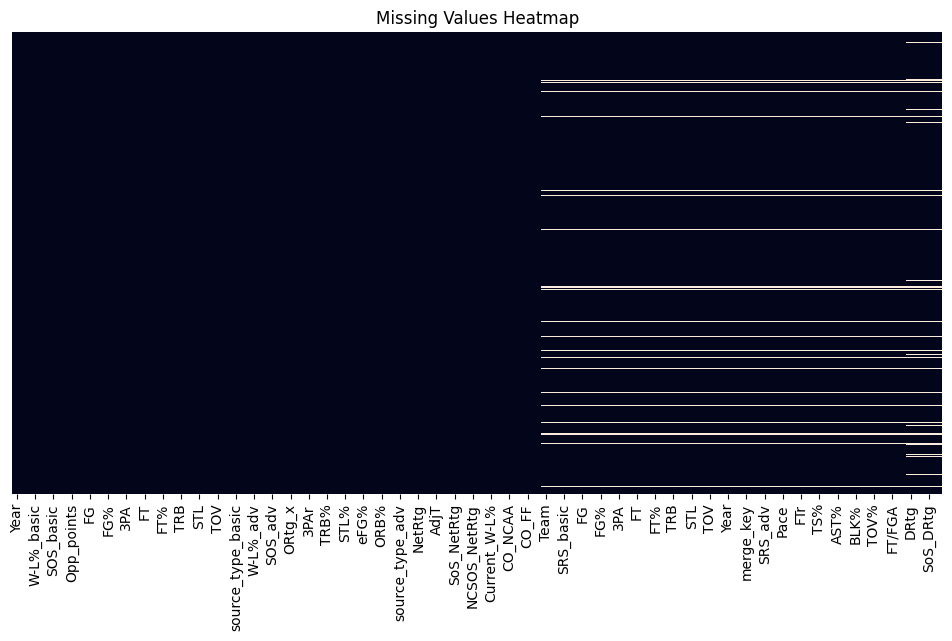

In [85]:
print(final_combined_df.head())
print()
print()
print('COLUMNS')
print(final_combined_df.columns)
print()
print()
print('SHAPE')
print(final_combined_df.shape)
print()
print()
print('INFO')
print(final_combined_df.info())
print()
print()
print('DESCRIBE')
print(final_combined_df.describe())
print()
print()
print('SUM NA')
print(final_combined_df.isna().sum().sort_values(ascending=False))
print()
print()
print('SUM DUPLICATED')
print(final_combined_df.duplicated().sum())
print()
print()
print('COLUMNS WITH NA')
nan_cols = final_combined_df.columns[final_combined_df.isna().any()]
print("Columns with NaN:", list(nan_cols))
print()
plt.figure(figsize=(12, 6))
sns.heatmap(final_combined_df.isna(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [86]:
# Returns a Boolean Series indicating duplicate rows
duplicates = final_combined_df.duplicated()

# View the actual duplicate rows
duplicate_rows = final_combined_df[duplicates]
print(f"Number of duplicate rows: {len(duplicate_rows)}")
print(duplicate_rows.head())

# Check duplicates based on 'Year' and 'Team' only
final_combined_df.duplicated(subset=["Year", "Team"])

# Drop all duplicate rows (keeping the first occurrence)
final_combined_df = final_combined_df.drop_duplicates(ignore_index=True)

Number of duplicate rows: 0
Empty DataFrame
Columns: [Year, Team, W-L%_basic, SRS_basic, SOS_basic, Tm_points, Opp_points, MP, FG, FGA, FG%, 3P, 3PA, 3P%, FT, FTA, FT%, ORB, TRB, AST, STL, BLK, TOV, PF, source_type_basic, merge_key, W-L%_adv, SRS_adv, SOS_adv, Pace, ORtg_x, FTr, 3PAr, TS%, TRB%, AST%, STL%, BLK%, eFG%, TOV%, ORB%, FT/FGA, source_type_adv, Rank, NetRtg, ORtg_y, AdjT, Luck, SoS_NetRtg, SoS_ORtg, NCSOS_NetRtg, Current_AP_Pre, Current_W-L%, CO_W-L%, CO_NCAA, CO_S16, CO_FF, CO_Chmp, Team, W-L%_basic, SRS_basic, SOS_basic, FG, FGA, FG%, 3P, 3PA, 3P%, FT, FTA, FT%, ORB, TRB, AST, STL, BLK, TOV, PF, Year, source_type_basic, merge_key, W-L%_adv, SRS_adv, SOS_adv, Pace, ORtg, FTr, 3PAr, TS%, TRB%, AST%, STL%, BLK%, eFG%, TOV%, ORB%, FT/FGA, source_type_adv, DRtg, Luck, ...]
Index: []

[0 rows x 102 columns]


In [87]:
# checking for duplicate columns 
duplicated_columns = final_combined_df.columns[final_combined_df.columns.duplicated()]
print(f"Number of duplicated columns: {len(duplicated_columns)}")
print("Duplicated columns:", duplicated_columns.tolist())

# Drop Duplicate columns
final_combined_df = final_combined_df.loc[:, ~final_combined_df.columns.duplicated()]

Number of duplicated columns: 41
Duplicated columns: ['Team', 'W-L%_basic', 'SRS_basic', 'SOS_basic', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'Year', 'source_type_basic', 'merge_key', 'W-L%_adv', 'SRS_adv', 'SOS_adv', 'Pace', 'FTr', '3PAr', 'TS%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'eFG%', 'TOV%', 'ORB%', 'FT/FGA', 'source_type_adv', 'Luck', 'NCSOS_NetRtg']


In [88]:
# Create an actual copy before modifying
final_combined_df = final_combined_df.copy()

# Now safely drop the columns
final_combined_df.drop(columns=['Tm_points', 'Opp_points', 'MP', 'source_type_basic', 'W-L%_adv', 'SRS_adv', 'SOS_adv', 'source_type_adv'], inplace=True)

In [89]:
#output_path = r"C:\Users\coltm\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Combined after Cleaning\final_combined_df.csv"

#Work Path
output_path = r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Combined after Cleaning\final_combined_df.csv"
final_combined_df.to_csv(output_path, index=False)

In [90]:
# Drop unneeded columns
#tournament_results_filtered.drop(columns=['BY YEAR NO'], inplace=True)

# Fix header alignment with tournament results
tournament_results_filtered = tournament_results_filtered.rename(columns={"TEAM": "Team", "YEAR": "Year", 'SEED' : 'Seed', 'CURRENT ROUND' : 'Current Round',
                                                                       'SCORE' : 'Score', 'TEAM NO' : 'Team No'})

# Ensure numeric types
tournament_results_filtered["Score"] = pd.to_numeric(tournament_results_filtered["Score"], errors="coerce")
tournament_results_filtered["Opponenet Score"] = pd.to_numeric(tournament_results_filtered["Opponenet Score"], errors="coerce")

# Champion logic
tournament_results_filtered["Champion"] = ((tournament_results_filtered["Current Round"] == 2) & (tournament_results_filtered["Score"] > tournament_results_filtered["Opponenet Score"])).astype(int)

# Changing St. or St to State did not take from the earlier cleaning 
def normalize_team_name(name: str) -> str:
    #Trim whitespace and collapse multiple spaces
    name = name.strip()
    name = re.sub(r'\s+', ' ', name)
    # Replace trailing `St.` or `St` with `State`
    name = re.sub(r'\bSt\.?$', 'State', name)
    return name

# Clean Team column and Opponent Column
tournament_results_filtered['Team'] = (tournament_results_filtered['Team'].apply(normalize_team_name))
tournament_results_filtered['Opponent'] = (tournament_results_filtered['Opponent'].apply(normalize_team_name))

# Create Merge Key in tournament_result_filtered
tournament_results_filtered["merge_key"] = tournament_results_filtered["Team"] + "_" + tournament_results_filtered["Year"].astype(str)

In [91]:
tournament_results_filtered

,Year,BY YEAR NO,Team No,Team,Seed,Current Round,Score,Opponent,Opponenet Score,Opponent Seed,Result,Champion,merge_key
0,2025,2140.0,1145,Alabama State,16,68,68,Saint Francis,70,16,0,0,Alabama State_2025
1,2025,2139.0,1099,Saint Francis,16,68,70,Alabama State,68,16,1,0,Saint Francis_2025
2,2025,2138.0,1104,North Carolina,11,68,95,San Diego State,68,11,1,0,North Carolina_2025
3,2025,2137.0,1097,San Diego State,11,68,68,North Carolina,95,11,0,0,San Diego State_2025
4,2025,2136.0,1108,Mount St. Mary's,16,68,83,American,72,16,1,0,Mount St. Mary's_2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,2012,501.0,303,Louisville,4,4,61,Kentucky,69,1,0,0,Louisville_2012
1640,2012,500.0,286,Ohio State,2,4,62,Kansas,64,2,0,0,Ohio State_2012
1641,2012,499.0,310,Kansas,2,4,64,Ohio State,62,2,1,0,Kansas_2012
1642,2012,498.0,308,Kentucky,1,2,67,Kansas,59,2,1,1,Kentucky_2012


In [92]:
output_path = r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Combined after Cleaning\tournament_result_filtered.csv"
tournament_results_filtered.to_csv(output_path, index=False)

In [93]:
champions = tournament_results_filtered[tournament_results_filtered["Champion"] == 1][["Year", "Team"]]
print(champions.sort_values("Year", ascending=False))

      Year            Team
132   2025         Florida
258   2024     Connecticut
385   2023     Connecticut
511   2022          Kansas
635   2021          Baylor
761   2019        Virginia
887   2018       Villanova
1013  2017  North Carolina
1138  2016       Villanova
1265  2015            Duke
1390  2014     Connecticut
1516  2013      Louisville
1642  2012        Kentucky


In [94]:
# Create initial df with only needed starting columns
champion_predictor_df = tournament_results_filtered.drop(columns=['Team No', 'Opponent', 'Opponenet Score'])
# Create list of just tournament teams
tournament_teams = tournament_results_filtered["Team"].dropna().astype(str).str.strip()
# Sort out duplicate team names
tournament_teams = sorted(tournament_teams.unique())
print(f"🧾 Total unique teams: {len(tournament_teams)}")
print(tournament_teams[:25])  # Show first 25 as a sanity check
print(champion_predictor_df.head())
print(champion_predictor_df.columns)

🧾 Total unique teams: 229
['Abilene Christian', 'Akron', 'Alabama', 'Alabama State', 'Albany', 'American', 'Arizona', 'Arizona State', 'Arkansas', 'Auburn', 'Austin Peay', 'BYU', 'Baylor', 'Belmont', 'Boise State', 'Bradley', 'Bryant', 'Bucknell', 'Buffalo', 'Butler', 'Cal Poly', 'Cal St. Bakersfield', 'Cal St. Fullerton', 'California', 'Chattanooga']
   Year  BY YEAR NO              Team  Seed  Current Round  Score  \
0  2025      2140.0     Alabama State    16             68     68   
1  2025      2139.0     Saint Francis    16             68     70   
2  2025      2138.0    North Carolina    11             68     95   
3  2025      2137.0   San Diego State    11             68     68   
4  2025      2136.0  Mount St. Mary's    16             68     83   

   Opponent Seed  Result  Champion              merge_key  
0             16       0         0     Alabama State_2025  
1             16       1         0     Saint Francis_2025  
2             11       1         0    North Carolin

In [97]:
remaining_teams = [
    ('2025', 'St. Francis (PA)'),
    ('2025', 'UC San Diego'), 
    ('2024', 'UAB'),
    ('2023', 'Texas A&M-Corpus Christi'),
    ('2023', 'Fairleigh Dickinson'),
    ('2022', 'UAB'), 
    ('2019', 'Fairleigh Dickinson'),
    ('2018', 'Maryland Baltimore County'),
    ('2015', 'UAB'),
    ('2012', 'Loyola Maryland'),
    ('2012', 'Detroit')
]

print("=== DEBUGGING REMAINING UNMATCHED TEAMS ===")

# Check what these teams are called in the stats dataset for each year
for year, team in remaining_teams:
    print(f"\n{year} - {team}:")
    
    # Find similar team names in stats data for that year
    year_stats = stats_final_deduped[stats_final_deduped['Year'] == int(year)]
    
    if len(year_stats) > 0:
        team_names = year_stats['Team_final'].tolist()
        
        # Look for partial matches
        partial_matches = [name for name in team_names if any(word in name for word in team.split())]
        if partial_matches:
            print(f"  Possible matches in stats data: {partial_matches[:3]}")
        
        # For specific problematic teams, show exact matches
        if 'Francis' in team:
            francis_teams = [name for name in team_names if 'Francis' in name or 'St.' in name]
            print(f"  All Francis/St. teams in {year}: {francis_teams}")
            
        elif 'UAB' in team:
            uab_teams = [name for name in team_names if 'UAB' in name or 'Alabama' in name or 'Birmingham' in name]
            print(f"  All UAB/Alabama/Birmingham teams in {year}: {uab_teams}")
            
        elif 'San Diego' in team:
            sd_teams = [name for name in team_names if 'San Diego' in name or 'Diego' in name]
            print(f"  All San Diego teams in {year}: {sd_teams}")
            
        elif 'Maryland' in team:
            md_teams = [name for name in team_names if 'Maryland' in name or 'UMBC' in name]
            print(f"  All Maryland teams in {year}: {md_teams}")
            
        elif 'Detroit' in team:
            det_teams = [name for name in team_names if 'Detroit' in name]
            print(f"  All Detroit teams in {year}: {det_teams}")
            
    else:
        print(f"  No stats data found for year {year}")

print(f"\n=== SUGGESTED ADDITIONAL CORRECTIONS ===")

# Based on common patterns, suggest final corrections
final_corrections = {
    'St. Francis (PA)': 'Saint Francis',  # Your alignment code maps to this
    'UC San Diego': 'San Diego',  # Common mapping
    'UAB': 'Alabama-Birmingham',  # Your alignment maps to this  
    'Texas A&M-Corpus Christi': 'Texas A&M-Corpus Christi',  # Should match exactly
    'Fairleigh Dickinson': 'FDU',  # Common abbreviation
    'Maryland Baltimore County': 'Maryland-Baltimore County',  # Hyphen difference
    'Loyola Maryland': 'Loyola (MD)',  # Your alignment format
    'Detroit': 'Detroit Mercy'  # Your alignment maps to this
}

print("Recommended corrections:")
for old_name, new_name in final_corrections.items():
    print(f"  '{old_name}' -> '{new_name}'")

# Apply these final corrections
print(f"\n=== APPLYING FINAL CORRECTIONS ===")

tournament_final_v2 = tournament_final.copy()
tournament_final_v2['Team_final_v2'] = tournament_final_v2['Team_final'].replace(final_corrections)

# Create new merge keys
tournament_final_v2['merge_key_final_v2'] = (
    tournament_final_v2['Year'].astype(str) + '_' + 
    tournament_final_v2['Team_final_v2'].astype(str)
)

# Final merge attempt
final_merged_v2 = tournament_final_v2.merge(
    stats_final_deduped.rename(columns={'Team_final': 'Team_final_v2', 'merge_key_final': 'merge_key_final_v2'}),
    on='merge_key_final_v2',
    how='left',
    suffixes=('', '_stats')
)

missing_v2 = final_merged_v2['Team_final_v2_stats'].isna().sum()
success_rate_v2 = ((len(final_merged_v2) - missing_v2) / len(final_merged_v2)) * 100

print(f"\nResults after final corrections:")
print(f"Missing stats: {missing_v2}")
print(f"Success rate: {success_rate_v2:.1f}%")

if missing_v2 > 0:
    print(f"\nStill unmatched:")
    still_unmatched = final_merged_v2[final_merged_v2['Team_final_v2_stats'].isna()][['Year', 'Team_final_v2']].drop_duplicates()
    print(still_unmatched.to_string(index=False))
    
    # For any still unmatched, check if they exist in stats data at all
    print(f"\nChecking if these teams exist in stats data for ANY year:")
    for _, row in still_unmatched.iterrows():
        team = row['Team_final_v2']
        matches_any_year = stats_final_deduped['Team_final'].str.contains(team, case=False, na=False)
        if len(matches_any_year) > 0:
            years = matches_any_year['Year'].unique()
            print(f"  {team}: Found in years {list(years)}")
        else:
            print(f"  {team}: Not found in any year - may not be in stats dataset")
else:
    print("Perfect match! All teams aligned successfully.")

# Clean final dataset
if missing_v2 <= 5:  # If we got it down to 5 or fewer, this is the final dataset
    columns_to_drop_v2 = [
        'Team_corrected', 'Team_final', 'Team_final_v2', 'merge_key_final', 'merge_key_final_v2',
        'Team_final_v2_stats', 'Year_stats', 'merge_key_final_v2_stats'
    ]
    columns_to_drop_v2 = [col for col in columns_to_drop_v2 if col in final_merged_v2.columns]
    
    champion_predictor_final = final_merged_v2.drop(columns=columns_to_drop_v2)
    
    print(f"\nFINAL DATASET READY:")
    print(f"Shape: {champion_predictor_final.shape}")
    print(f"Success rate: {success_rate_v2:.1f}%")
    print("Variable name: champion_predictor_final")

=== DEBUGGING REMAINING UNMATCHED TEAMS ===

2025 - St. Francis (PA):


NameError: name 'stats_final_deduped' is not defined

In [ ]:
champion_predictor_final

In [ ]:
champion_predictor_final = champion_predictor_final.fillna(0)

In [ ]:
output_path = r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Combined after Cleaning\champion_predictor_final.csv"
champion_predictor_final.to_csv(output_path, index=False)